# RCLV SLA Eddy Chl PDFs & Relative Differences

Ocean Science Figs: 3,4,5,B5,B6,B7,B9

Bootstrapping done in: `bootstrapping_error_analysis.py`

Chl datasets formed in: `SLA_and_RCLV_eddy_chl_v6.0_with_eddy_provinces.py` and `summarize_eddy_chl_data.py`

LJK

Date Created: 12/23/2024

Last Edited: 01/30/2025

In [1]:
import csv
import numpy as np
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import Image, display
from config import *

In [2]:
fontsize = 18

plt.rc('font', size=fontsize)          # controls default text sizes
plt.rc('axes', titlesize=fontsize)     # fontsize of the axes title
plt.rc('axes', labelsize=fontsize)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=fontsize)    # fontsize of the tick labels
plt.rc('ytick', labelsize=fontsize)    # fontsize of the tick labels
plt.rc('legend', fontsize=fontsize)    # legend fontsize
plt.rc('figure', titlesize=fontsize)  # fontsize of the figure title

In [3]:
# Color palette
bg_color = '#808080'

SLA_only_anti_color = '#FFA09A' #lightest
SLA_all_anti_color = '#e84a4a'
RCLV_all_anti_color = '#991414' # darkest
anti_colors = [SLA_only_anti_color,SLA_all_anti_color,RCLV_all_anti_color]

SLA_only_cyc_color = '#B2B2FE' 
SLA_all_cyc_color = '#6e6ef7'
RCLV_all_cyc_color = '#08088A'
cyc_colors = [SLA_only_cyc_color,SLA_all_cyc_color,RCLV_all_cyc_color]

## Full Domain

Load raw data for the PDF histograms and relative difference plots.

In [4]:
season,province = 'ALL','ALL'
data_dir = project_output_dir + 'eddy_masks_and_chl_2000_to_2020/chl_feature_bins_full_domain/'

bg_chl = np.load(data_dir + '%s_bg_chl_clim_anom_p%s.npy'%(season,province))
SLA_only_anti_chl = np.load(data_dir + '%s_SSH_anti_chl_clim_anom_p%s.npy'%(season,province))
RCLV_only_anti_chl = np.load(data_dir + '%s_coh_anti_chl_clim_anom_p%s.npy'%(season,province))
overlap_anti_chl = np.load(data_dir + '%s_SSH_coh_anti_chl_clim_anom_p%s.npy'%(season,province))
SLA_only_cyc_chl = np.load(data_dir + '%s_SSH_cyc_chl_clim_anom_p%s.npy'%(season,province))
RCLV_only_cyc_chl = np.load(data_dir + '%s_coh_cyc_chl_clim_anom_p%s.npy'%(season,province))
overlap_cyc_chl = np.load(data_dir + '%s_SSH_coh_cyc_chl_clim_anom_p%s.npy'%(season,province))

# Combine the type only and overlaps together
SLA_ANTI_CHL = np.concatenate((SLA_only_anti_chl,overlap_anti_chl))
RCLV_ANTI_CHL = np.concatenate((RCLV_only_anti_chl,overlap_anti_chl))
SLA_CYC_CHL = np.concatenate((SLA_only_cyc_chl,overlap_cyc_chl))
RCLV_CYC_CHL = np.concatenate((RCLV_only_cyc_chl,overlap_cyc_chl))

In [5]:
anti_datasets = [SLA_only_anti_chl,SLA_ANTI_CHL,RCLV_ANTI_CHL]
anti_labels = ['Anti SLA \n Excluding RCLVs','Anti SLA','Anti RCLV']

cyc_datasets = [SLA_only_cyc_chl,SLA_CYC_CHL,RCLV_CYC_CHL]
cyc_labels = ['Cyc SLA \n Excluding RCLVs','Cyc SLA','Cyc RCLV']

In [6]:
background_eddy_vals = [['','Background','Total','% Background','% Eddy']]

tot_pixels = len(bg_chl)+len(SLA_only_anti_chl)+len(RCLV_only_anti_chl)+len(overlap_anti_chl)+len(SLA_only_cyc_chl)+len(RCLV_only_cyc_chl)+len(overlap_cyc_chl)
background_eddy_vals.append(['Full Domain (All Seasons)',len(bg_chl),tot_pixels,'%s'%(round((len(bg_chl)/tot_pixels)*100,2)),'%s'%(round(((tot_pixels-len(bg_chl))/tot_pixels)*100,2))])
background_eddy_vals

[['', 'Background', 'Total', '% Background', '% Eddy'],
 ['Full Domain (All Seasons)', 283319424, 342639336, '82.69', '17.31']]

Load bootstrapping results from `bootstrapping_error_analysis.ipynb`

In [7]:
bootstrap_dir = project_output_dir + 'eddy_masks_and_chl_2000_to_2020/chl_feature_bins_full_domain/bootstrap_error/'

labels = ['Anti_SLA_Excluding_RCLVs','Anti_SLA','Anti_RCLV']
anti_CI_min,anti_CI_max = [],[]
for a in labels:
    anti_CI_min.append(np.load(bootstrap_dir + 'fdclim_bootstrap_1000_resample_2.5p_%s_ALL.npy'%(a)))
    anti_CI_max.append(np.load(bootstrap_dir + 'fdclim_bootstrap_1000_resample_97.5p_%s_ALL.npy'%(a)))

labels = ['Cyc_SLA_Excluding_RCLVs','Cyc_SLA','Cyc_RCLV']
cyc_CI_min,cyc_CI_max = [],[]
for a in labels:
    cyc_CI_min.append(np.load(bootstrap_dir + 'fdclim_bootstrap_1000_resample_2.5p_%s_ALL.npy'%(a)))
    cyc_CI_max.append(np.load(bootstrap_dir + 'fdclim_bootstrap_1000_resample_97.5p_%s_ALL.npy'%(a)))

Anti SLA 
 Excluding RCLVs x-axis intersections: [-0.00387598  0.04270138]
Maximums: y=0.1580563040389563, x=0.02458796
Anti SLA x-axis intersections: [-0.0002533   0.04942922]
Maximums: y=0.27906007501972563, x=0.028210644
Anti RCLV x-axis intersections: [0.00233434 0.06133232 0.06184985 0.0628849 ]
Maximums: y=0.5971623376152395, x=0.0313158
Cyc SLA 
 Excluding RCLVs x-axis intersections: [-0.00698114  0.01113228  0.01164981  0.01216733]
Maximums: y=0.06276786301197324, x=0.0028518615
Cyc SLA x-axis intersections: [-0.00542856  0.01630754]
Maximums: y=0.09339420767270913, x=0.004921966
Cyc RCLV x-axis intersections: [-0.0043935]
Maximums: y=0.20422895820662046, x=0.055122007


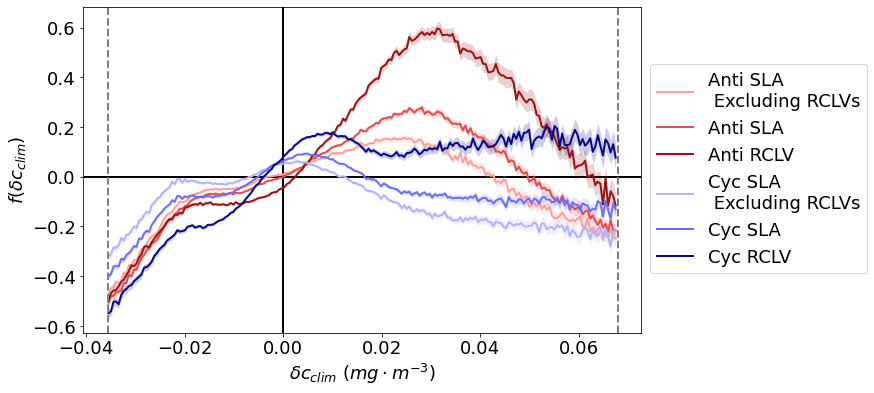

In [8]:
fig,ax = plt.subplots(1,1, figsize=(10,6))

linewidth = 2
num_bins = 200

# Background data (need this to subtract and set the limits)
bg_quant_min,bg_quant_max = np.quantile(bg_chl,0.01),np.quantile(bg_chl,0.99)
bg_counts,bg_bins = np.histogram(bg_chl,bins=num_bins,density=True,range=(bg_quant_min,bg_quant_max))

# Lineplots
for a in np.arange(0,len(anti_datasets)):        
    # Raw data
    counts,bins = np.histogram(anti_datasets[a],bins=num_bins,density=True,range=(bg_quant_min,bg_quant_max))
    y_vals = (counts-bg_counts)/bg_counts
    ax.plot(bg_bins[:-1],y_vals,c=anti_colors[a],linewidth=linewidth,label=anti_labels[a]) # difference plot
    
    # Bootstrap confidence interval
    ax.fill_between(bg_bins[:-1],anti_CI_min[a],anti_CI_max[a],color=anti_colors[a],alpha=0.2,linewidth=0)
                
    # Check x-axis intersections 
    idx = np.argwhere(np.diff(np.sign(y_vals - [0]*len(y_vals)))).flatten()
    zeros = bg_bins[:-1][idx]
    print('%s x-axis intersections: %s'%(anti_labels[a],zeros))
    
    y_max = np.max(y_vals)
    chl_anom_y_max = bg_bins[:-1][np.where(y_vals==y_max)[0][0]]
    print('Maximums: y=%s, x=%s'%(y_max,chl_anom_y_max))
    
for a in np.arange(0,len(cyc_datasets)):        
    counts,bins = np.histogram(cyc_datasets[a],bins=num_bins,density=True,range=(bg_quant_min,bg_quant_max))
    y_vals = (counts-bg_counts)/bg_counts
    ax.plot(bg_bins[:-1],y_vals,c=cyc_colors[a],linewidth=linewidth,label=cyc_labels[a]) # difference plot
                
    # Bootstrap confidence interval
    ax.fill_between(bg_bins[:-1],cyc_CI_min[a],cyc_CI_max[a],color=cyc_colors[a],alpha=0.2,linewidth=0)
        
    # Check x-axis intersections 
    idx = np.argwhere(np.diff(np.sign(y_vals - [0]*len(y_vals)))).flatten()
    zeros = bg_bins[:-1][idx]
    print('%s x-axis intersections: %s'%(cyc_labels[a],zeros))
    
    y_max = np.max(y_vals)
    chl_anom_y_max = bg_bins[:-1][np.where(y_vals==y_max)[0][0]]
    print('Maximums: y=%s, x=%s'%(y_max,chl_anom_y_max))
    
ax.axhline(0,color='k',linewidth=linewidth,zorder=0) #horizontal 0 line
ax.axvline(0,color='k',linewidth=linewidth,zorder=0) #vertical 0 line
ax.axvline(bg_quant_min,linewidth=linewidth,linestyle='--',color=bg_color) #1% quantile
ax.axvline(bg_quant_max,linewidth=linewidth,linestyle='--',color=bg_color) #99% quantile
ax.set_ylabel('$f(\delta c_{clim}$)')
ax.set_xlabel('$\delta c_{clim}$ ($mg \cdot m^{-3}$)')

ax.legend(bbox_to_anchor=(1,0.85))

save_dir = project_output_dir + 'RCLV_CHL_PAPER_FIGS/'
#plt.savefig(save_dir + 'cum_chl_without_schematic_OS_r1.png', format='png', dpi=350,bbox_inches='tight')

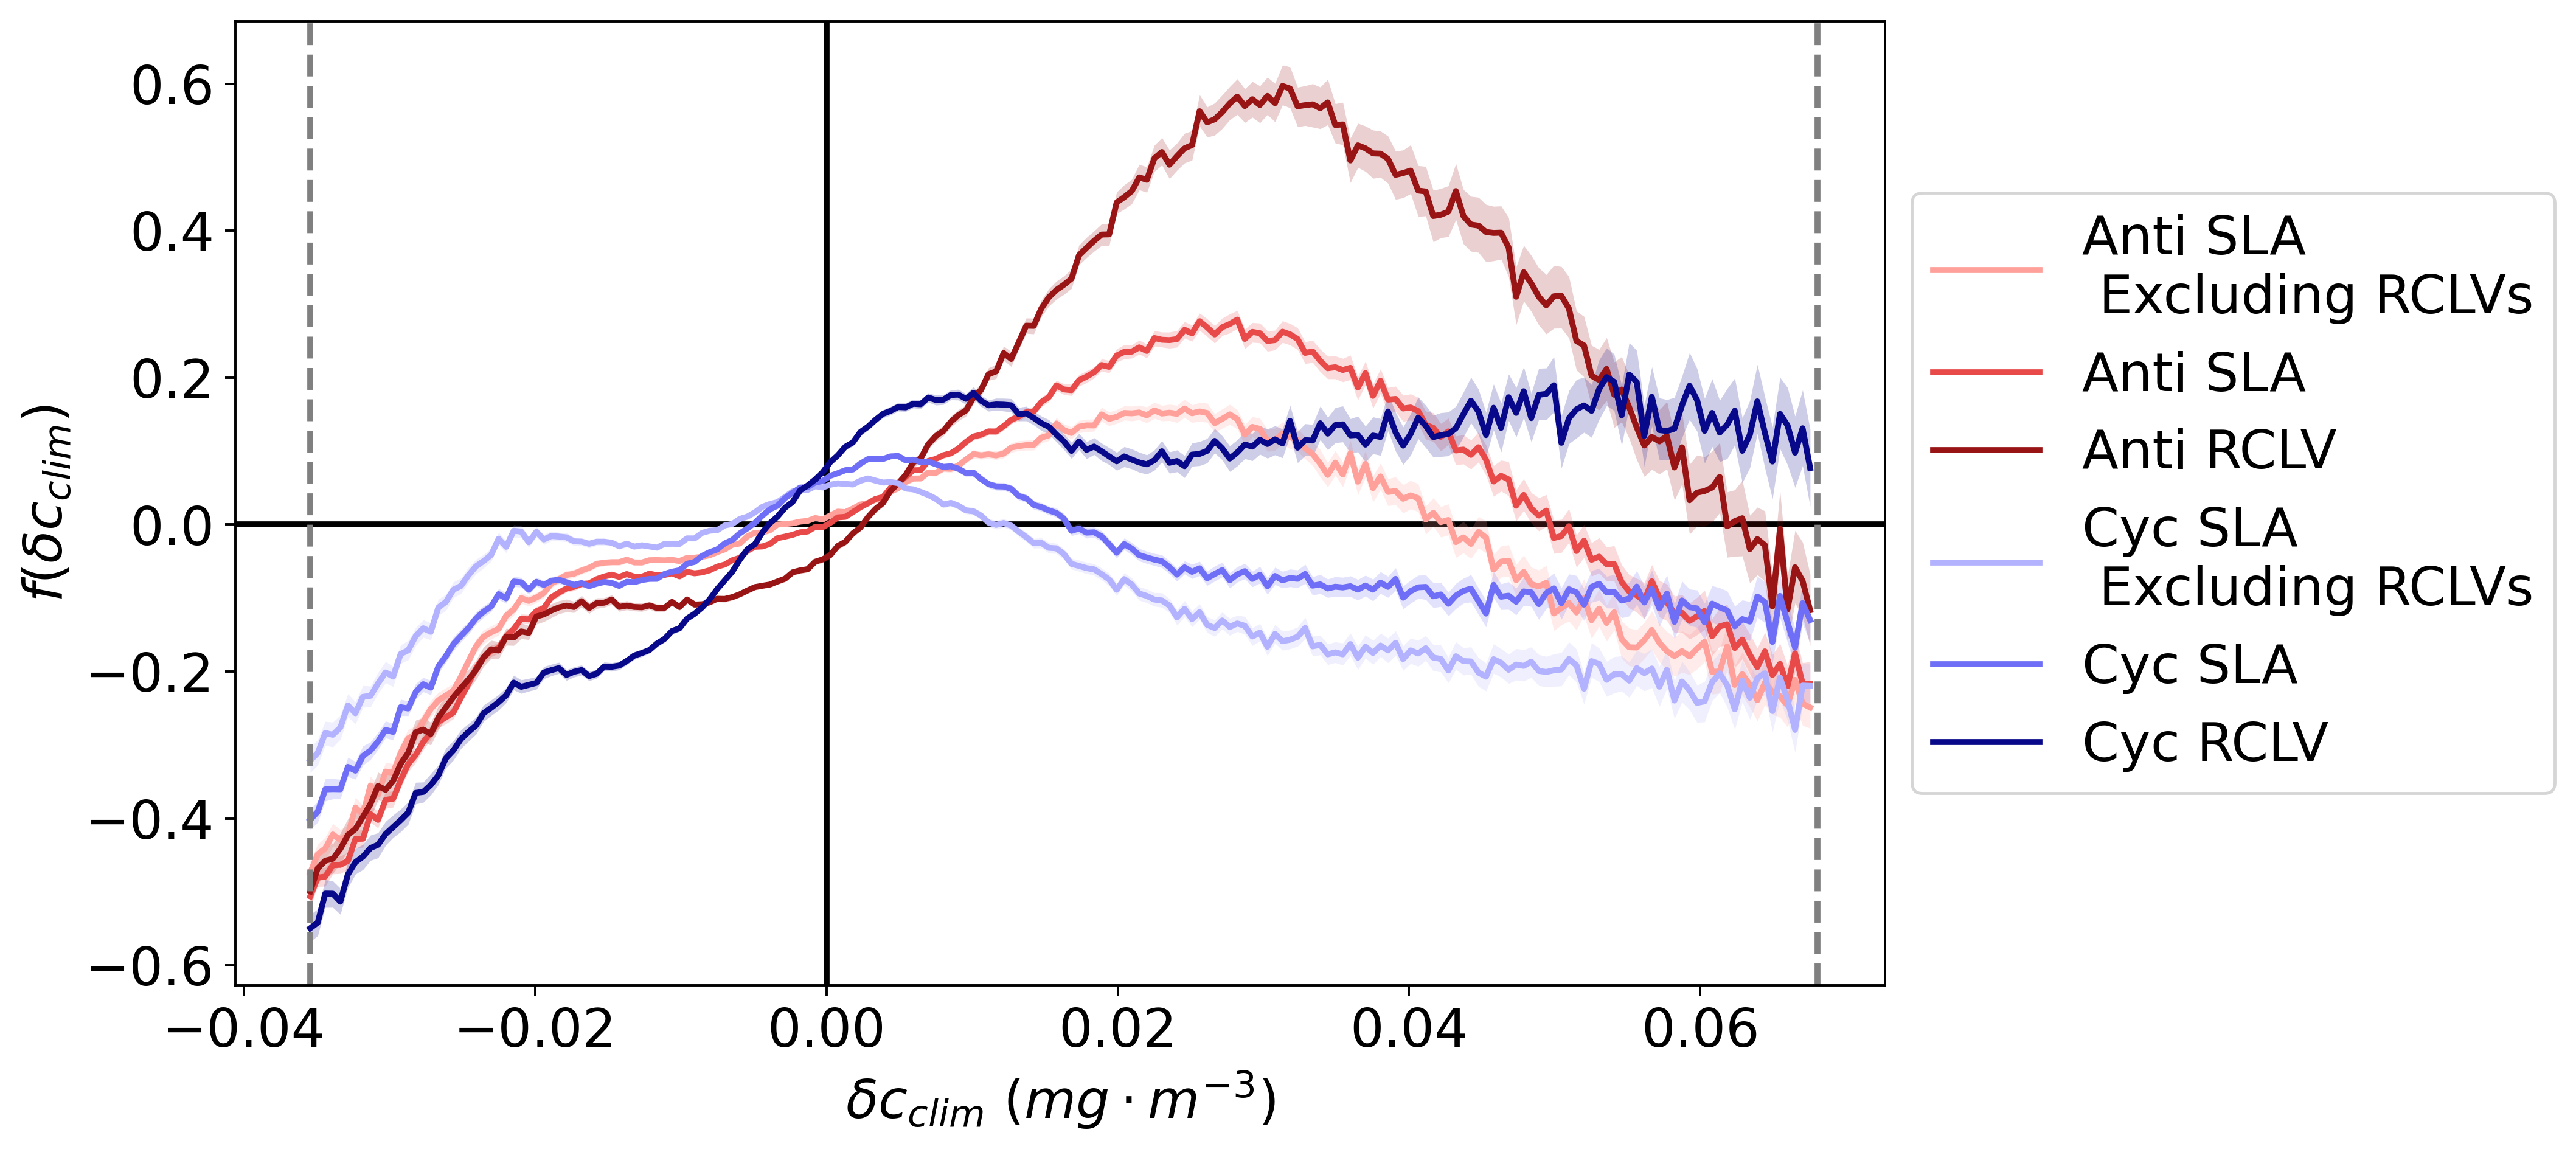

In [21]:
display(Image(filename=save_dir + 'cum_chl_without_schematic_OS_r1.png'))

### Full Domain PDF Supp Plot

In [9]:
quantiles = [0.01,0.05,0.25,0.5,0.75,0.95,0.99]

# Background data
bg_quants = []
for q in quantiles:
    bg_quants.append(np.quantile(bg_chl,q))
bg_median = bg_quants[3]

range_min,range_max = np.quantile(bg_chl,0.01),np.quantile(bg_chl,0.99)

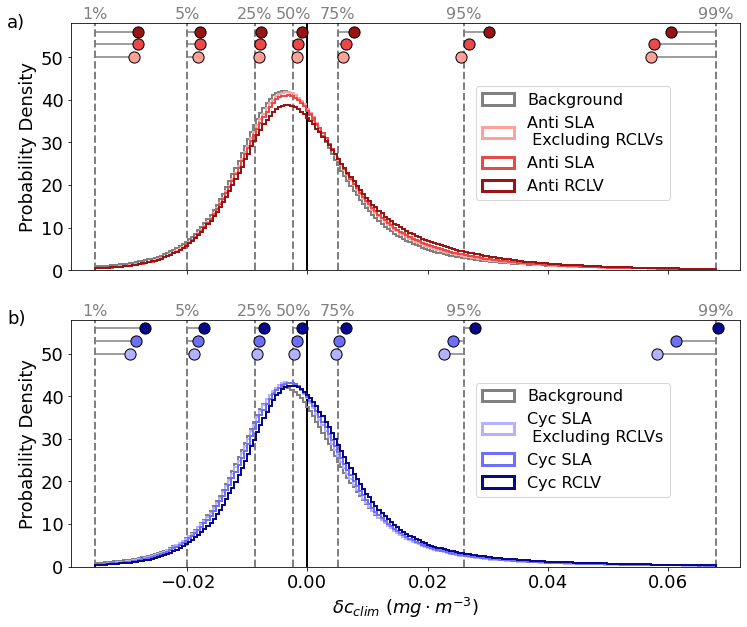

In [9]:
linewidth = 2
num_bins = 200
dot_size = 500

fig, ax = plt.subplots(2,1,figsize=(12,10))

# Blot background quantiles
for a in [0,1]:
    bg_counts,bg_bins,bg_bars = ax[a].hist(bg_chl, bins=num_bins, histtype="step", density=True,range=(range_min,range_max),linewidth=linewidth,color=bg_color,label='Background');
    for q in np.arange(0,len(bg_quants)):
        ax[a].axvline(bg_quants[q],linewidth=linewidth,linestyle='--',color=bg_color,zorder=0)
        ax[a].text(bg_quants[q],59,'%s%%'%(round(quantiles[q]*100)),fontsize=fontsize-2,
                   horizontalalignment='center',color=bg_color)
            
for a in np.arange(0,len(anti_datasets)):        
    anti_counts,anti_bins,anti_bars = ax[0].hist(anti_datasets[a],bins=num_bins,histtype="step",density=True,range=(range_min,range_max),linewidth=linewidth,color=anti_colors[a],label=anti_labels[a]); # histogram
            
    for q in np.arange(0,len(quantiles)):
        y = 50+(a*3)
        ax[0].scatter(np.quantile(anti_datasets[a],quantiles[q]),y,color=anti_colors[a],marker='.',s=dot_size,edgecolors='k')
        ax[0].plot([bg_quants[q],np.quantile(anti_datasets[a],quantiles[q])],[y,y],zorder=0,c='gray')
        
for a in np.arange(0,len(cyc_datasets)):        
    cyc_counts,cyc_bins,cyc_bars = ax[1].hist(cyc_datasets[a],bins=num_bins,histtype="step",density=True,range=(range_min,range_max),linewidth=linewidth,color=cyc_colors[a],label=cyc_labels[a]); # histogram
            
    for q in np.arange(0,len(quantiles)):
        y = 50+(a*3)
        ax[1].scatter(np.quantile(cyc_datasets[a],quantiles[q]),y,color=cyc_colors[a],marker='.',s=dot_size,edgecolors='k')
        ax[1].plot([bg_quants[q],np.quantile(cyc_datasets[a],quantiles[q])],[y,y],zorder=0,c='gray')
        
ax[0].set_xticklabels([])

for j in [0,1]:
    ax[j].set_ylabel('Probability Density',fontsize=fontsize)
    ax[j].set_xlim([range_min-0.004,range_max+0.004])
    ax[j].set_ylim([0,58])
    ax[j].axvline(0,color='k',linewidth=linewidth,zorder=0) #vertical 0 line
    leg = ax[j].legend(fontsize=fontsize-2,loc='best',bbox_to_anchor=(0.5, 0.25,0.5,0.5))
    for legobj in leg.legendHandles:
        legobj.set_linewidth(3)
    
    
# Labels
ax[1].set_xlabel('$\delta c_{clim}$ ($mg \cdot m^{-3}$)',fontsize=fontsize)
ax[0].text(-0.05,57,'a)',fontsize=fontsize)
ax[1].text(-0.05,57,'b)',fontsize=fontsize)

save_dir = project_output_dir + 'RCLV_CHL_PAPER_FIGS/'
#plt.savefig(save_dir + 'cum_chl_hists_r1.png', format='png', dpi=350)

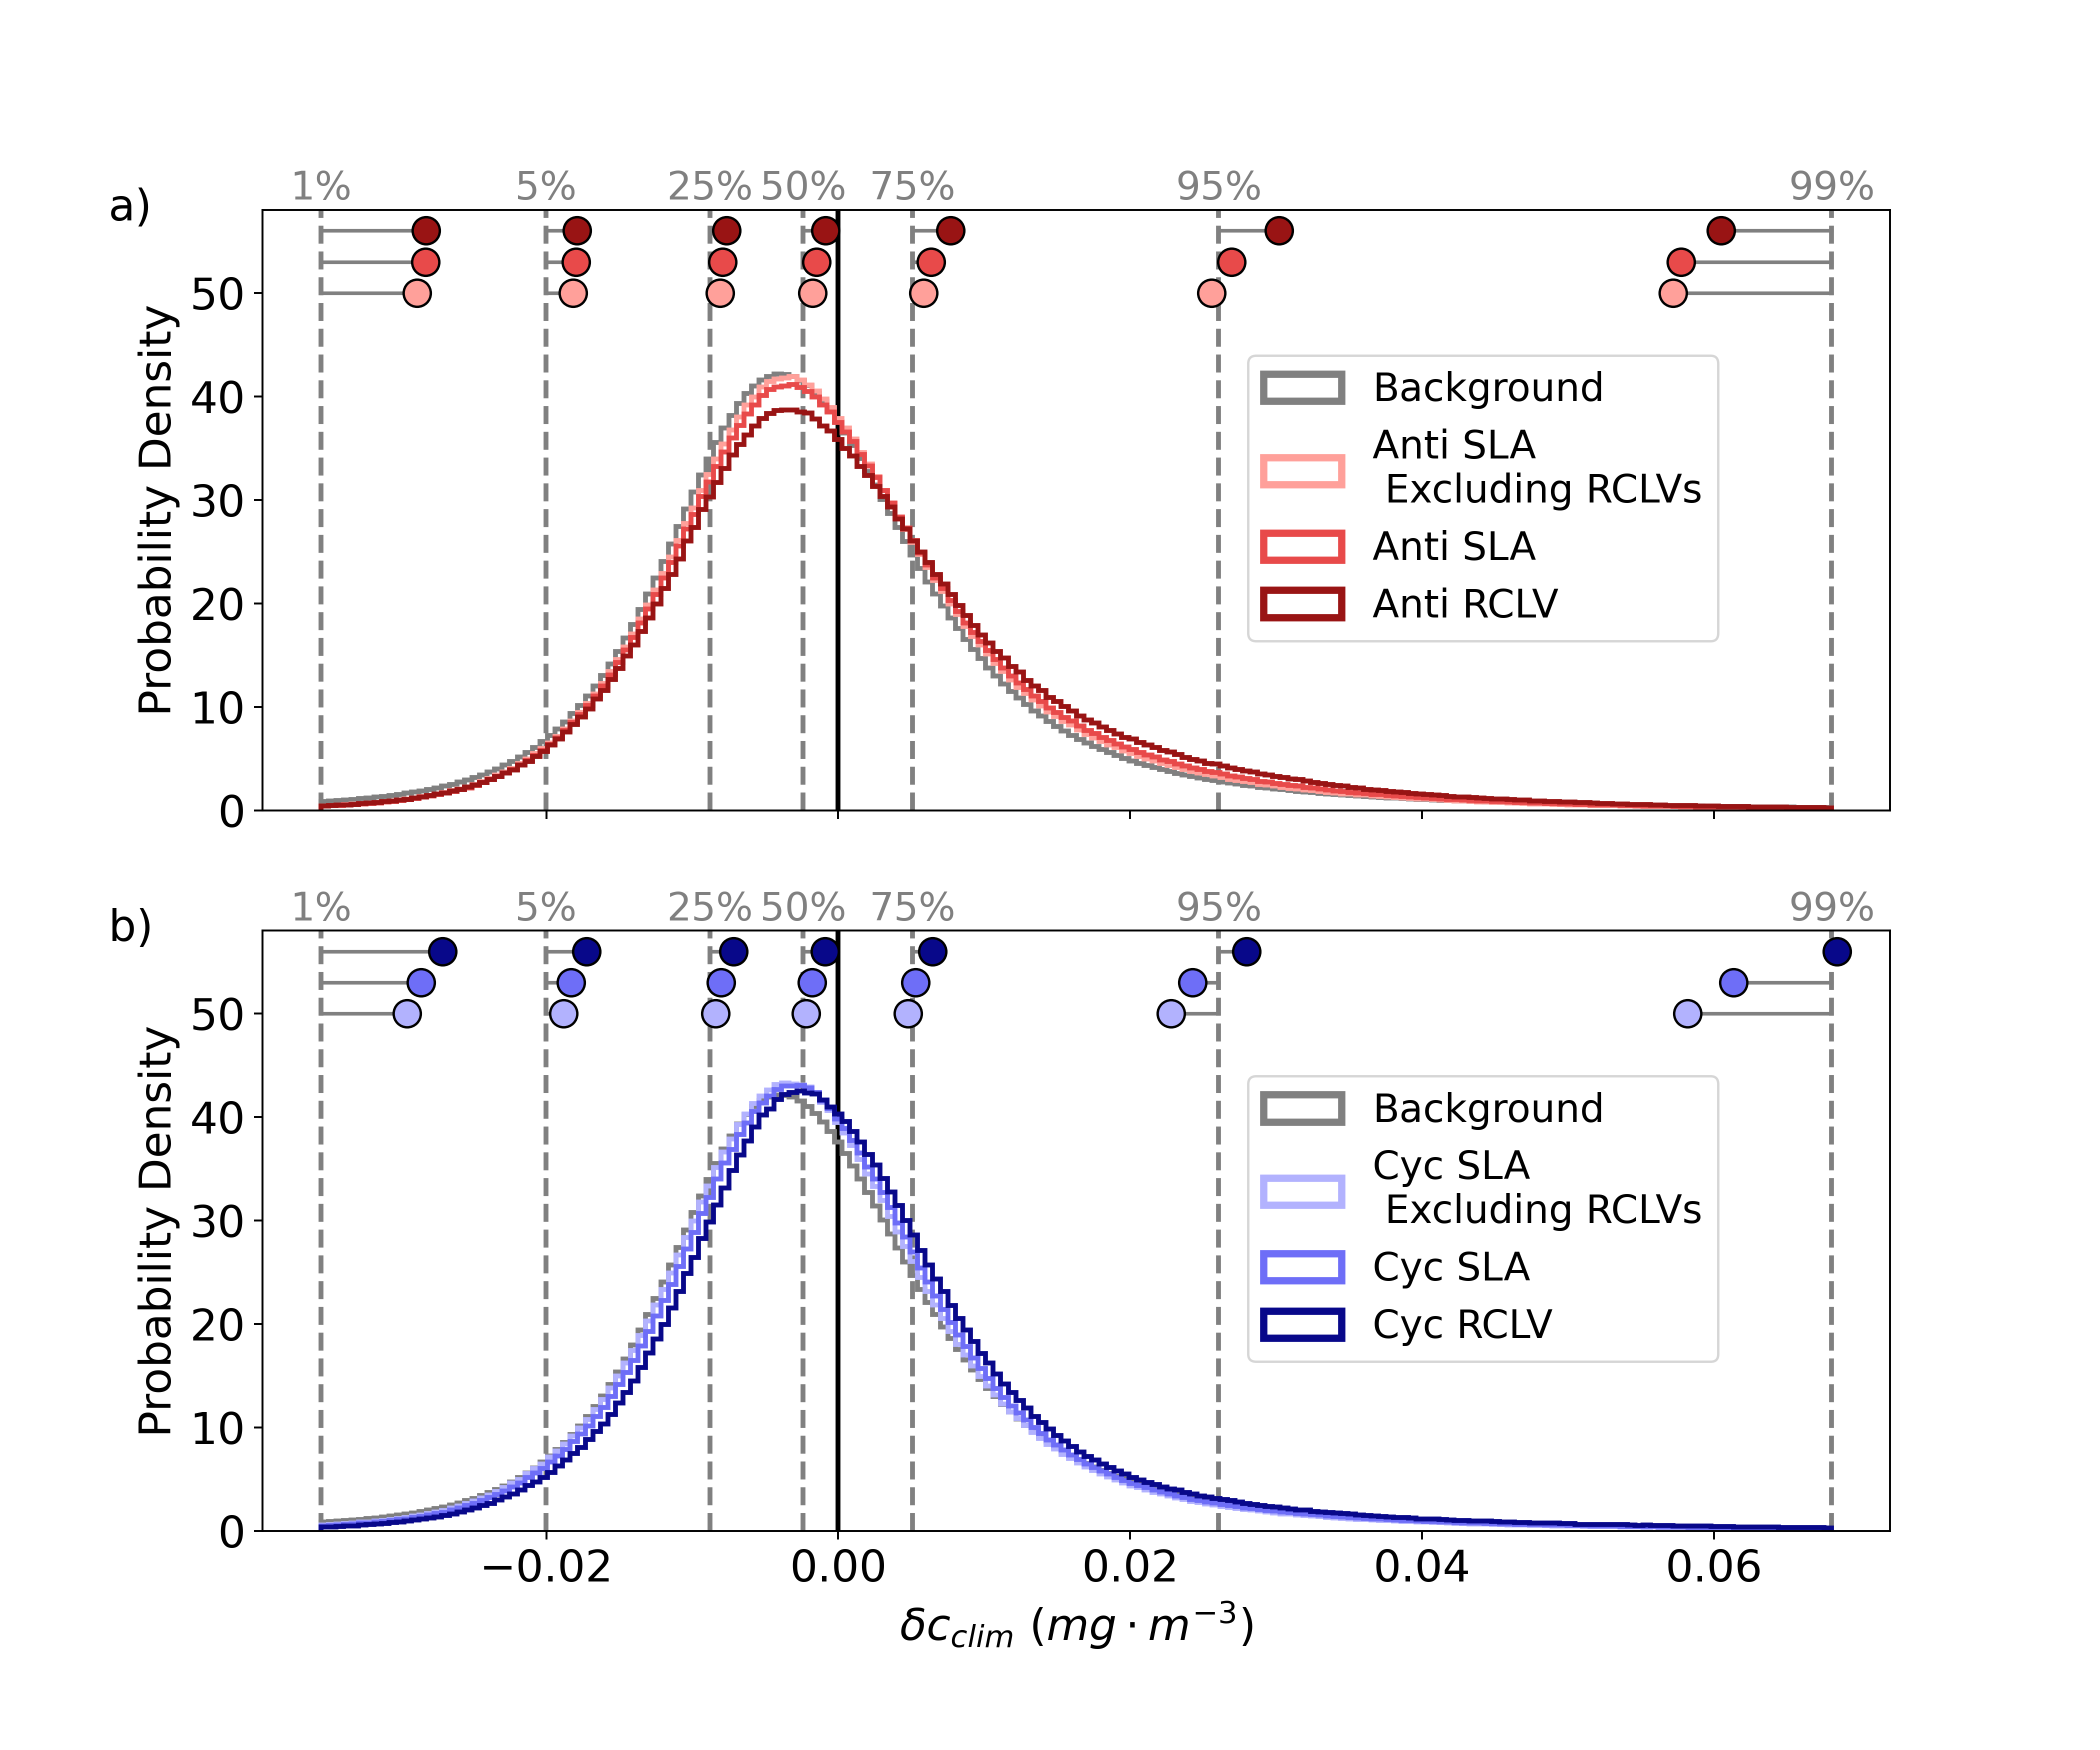

In [44]:
display(Image(filename=save_dir + 'cum_chl_hists_r1.png'))

## Latitudinal Plots

In [87]:
def plot_polarity_prob():
    save_dir = project_output_dir + 'eddy_spatial_frequencies/includes_genesis/'
    RCLV_P = np.load(save_dir + 'RCLV_P_includes_genesis_ALL.npy')
    lon_array = np.arange(180,230,0.04166667)
    lat_array = np.arange(15,30,0.04166667)
    
    fontsize = 18
    vmin,vmax = -1,1
    levels=15

    fig,ax = plt.subplots(1,1,figsize=(20,6))

    plot = ax.contourf(lon_array,lat_array,RCLV_P,vmin=vmin,vmax=vmax,cmap='bwr',levels=levels)
    ax.tick_params(axis='both', which='major', labelsize=fontsize)
    ax.set_yticks(np.arange(16,30,4))
    ax.set_xlabel('Longitude',fontsize=fontsize)
    ax.set_ylabel('Latitude',fontsize=fontsize)

    ############################### PROVINCES ###############################
    ax.axhline(23,color='k',linewidth=5)
    ax.axhline(19.5,xmax=0.49,color='k',linewidth=5)
    ax.plot([199,204.5],[23,20],color='k',linewidth=5) # top of cyclones
    ax.plot([198.5,204.5],[15,19],color='k',linewidth=5) # bottom of anticycs
    ax.plot([204.5,204.5],[19,20],color='k',linewidth=5)
    
    ax.text(202,26,'North',fontweight="bold",fontsize=fontsize+10)
    ax.text(212,19,'Southeast',fontweight="bold",fontsize=fontsize+10)

    ############################### COLORBAR ###############################
    cbar = plt.colorbar(plot,pad=0.005)
    cbar.ax.tick_params(labelsize=fontsize)
    cbar.ax.set_ylabel('Polarity Probability',fontsize=fontsize,rotation=270,labelpad=20);
    
    ax.text(177.5,30.25,'a)',fontsize=fontsize) # panel label    
    
    save_dir = project_output_dir + 'RCLV_CHL_PAPER_FIGS/'
    #plt.savefig(save_dir + 'RCLV_pol_prob.png', format='png', dpi=350)

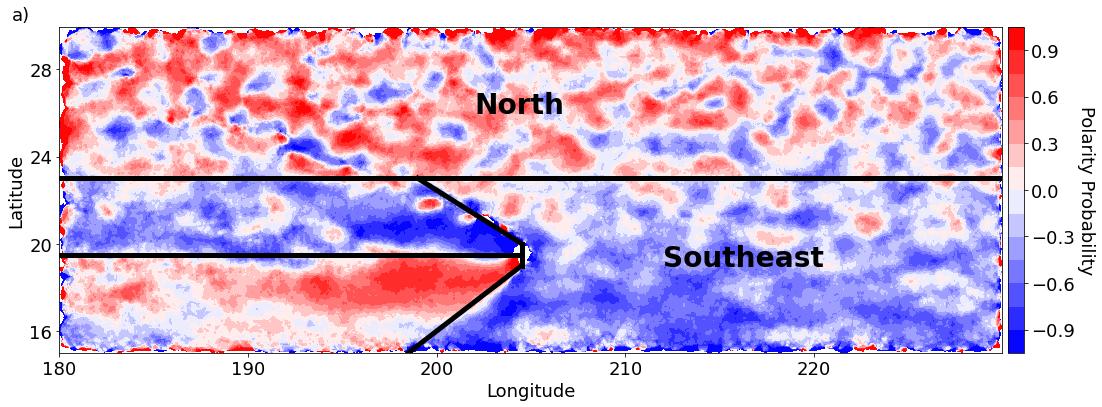

In [88]:
plot_polarity_prob()

In [10]:
def prob_dens_diff_plots(polarity):
    """
    polarity: 'anti' or 'cyc'
    """

    #### SET UP PLOT ####
    fontsize = 18 
    linewidth = 2
    num_bins = 100
    
    if polarity == 'anti':
        pol_str = 'Anti'
        colors = anti_colors
    elif polarity == 'cyc':
        pol_str = 'Cyc'
        colors = cyc_colors
        
    labels = ['%s SLA Excluding \n RCLVs'%(pol_str),'%s SLA'%(pol_str),'%s RCLV'%(pol_str)]
    
    ###### LOAD & PLOT THE DATA #####
    all_bg_quant_mins,all_bg_quant_maxes = {},{}
    
    s = 0
    for season in ['WINTER','SPRING','SUMMER','FALL']:   
        p = 0
        for province in [1,0]:
            #### Province key #### 0: SE, 1: Northern lats, 2: Upper cyclonic lee eddies, 3: Lower anticyclonic lee eddies
            data_dir = project_output_dir + 'eddy_masks_and_chl_2000_to_2020/chl_feature_bins_eddy_provinces/'
            bg_chl = np.load(data_dir + '%s_bg_chl_clim_anom_p%s.npy'%(season,province))
            SLA_only_chl = np.load(data_dir + '%s_SSH_%s_chl_clim_anom_p%s.npy'%(season,polarity,province))
            RCLV_only_chl = np.load(data_dir + '%s_coh_%s_chl_clim_anom_p%s.npy'%(season,polarity,province))
            overlap_chl = np.load(data_dir + '%s_SSH_coh_%s_chl_clim_anom_p%s.npy'%(season,polarity,province))

            # Combine the type only and overlaps together
            SLA_CHL = np.concatenate((SLA_only_chl,overlap_chl))
            RCLV_CHL = np.concatenate((RCLV_only_chl,overlap_chl))
            datasets = [SLA_only_chl,SLA_CHL,RCLV_CHL]
                                
            #print('Bg P%s %s %s N: %s'%(province,polarity,season,str(len(bg_chl))))
            #print('SLA P%s %s %s N: %s'%(province,polarity,season,str(len(SLA_CHL))))
            #print('RCLV P%s %s %s N: %s'%(province,polarity,season,str(len(RCLV_CHL))))
            #print('SLA exc RCLVs P%s %s %s N: %s'%(province,polarity,season,str(len(SSH_chl))))
    
            # Background data (need this to subtract and set the limits)
            bg_quant_min,bg_quant_max = np.quantile(bg_chl,0.01),np.quantile(bg_chl,0.99)
            all_bg_quant_mins[str(province)+season] = bg_quant_min
            all_bg_quant_maxes[str(province)+season] = bg_quant_max
            bg_counts,bg_bins = np.histogram(bg_chl,bins=num_bins,density=True,range=(bg_quant_min,bg_quant_max))
            
            # Load bootstrap results
            bootstrap_dir = project_output_dir + 'eddy_masks_and_chl_2000_to_2020/chl_feature_bins_eddy_provinces/bootstrap_error/' 
            
            if province == 1:
                p_str = 'N'
            elif province == 0:
                p_str = 'SE'
            
            CI_min,CI_max = [],[]
            if polarity == 'anti':
                labels = ['Anti_SLA_Excluding RCLVs','Anti_SLA','Anti_RCLV']
                for a in labels:
                    CI_min.append(np.load(bootstrap_dir + 'fdclim_bootstrap_1000_resample_2.5p_%s_%s_%s.npy'%(a,season,p_str)))
                    CI_max.append(np.load(bootstrap_dir + 'fdclim_bootstrap_1000_resample_97.5p_%s_%s_%s.npy'%(a,season,p_str)))
            
            elif polarity == 'cyc':
                labels = ['Cyc_SLA_Excluding_RCLVs','Cyc_SLA','Cyc_RCLV']
                for a in labels:
                    CI_min.append(np.load(bootstrap_dir + 'fdclim_bootstrap_1000_resample_2.5p_%s_%s_%s.npy'%(a,season,p_str)))
                    CI_max.append(np.load(bootstrap_dir + 'fdclim_bootstrap_1000_resample_97.5p_%s_%s_%s.npy'%(a,season,p_str)))
            
            ##################################### PLOT #####################################
            # Lineplots 
            for a in np.arange(0,len(datasets)):        
                counts,bins = np.histogram(datasets[a],bins=num_bins,density=True,range=(bg_quant_min,bg_quant_max))
                y_vals = (counts-bg_counts)/bg_counts
                ax[s,p].plot(bg_bins[:-1],y_vals,c=colors[a],linewidth=linewidth,label=labels[a].replace('_',' ')) # difference plot
                
                # Bootstrap confidence interval
                ax[s,p].fill_between(bg_bins[:-1],CI_min[a],CI_max[a],color=colors[a],alpha=0.2,linewidth=0)
                
                # Check x-axis intersections 
                idx = np.argwhere(np.diff(np.sign(y_vals - [0]*len(y_vals)))).flatten()
                zeros = bg_bins[:-1][idx]
                print('%s %s %s x-axis intersections: %s'%(labels[a],season,province,zeros))
                
                y_max = np.max(y_vals)
                chl_anom_y_max = bg_bins[:-1][np.where(y_vals==y_max)[0][0]]
                print('Maximums: y=%s, x=%s'%(y_max,chl_anom_y_max))
        
            ax[s,p].axvline(0,color='k',linewidth=linewidth+1,zorder=0) #vertical 0 line
            ax[s,p].axhline(0,color='k',linewidth=linewidth+1,zorder=0) #horizontal 0 line
            
            ax[s,p].set_xlim([-0.06,0.095])
            ax[s,p].tick_params(axis='both',which='major',labelsize=fontsize)
            ax[s,p].set_ylim([-0.85,1.3])
            
            ax[s,p].set_axisbelow(True)
            ax[s,p].yaxis.grid(color='gray')
            ax[s,p].xaxis.grid(color='gray')
            
            # Vertical lines showing bounds
            ax[s,p].axvline(bg_quant_min,linewidth=linewidth,linestyle='--',color=bg_color) #1% quantile
            ax[s,p].axvline(bg_quant_max,linewidth=linewidth,linestyle='--',color=bg_color) #99% quantile
            
            p += 1
        s += 1
        
    ###### PLOT PARAMS ##### 
    ax[0,0].set_ylabel('Winter \n $\it{f}(\delta c_{clim}$)',fontsize=fontsize)
    ax[1,0].set_ylabel('Spring \n $\it{f}(\delta c_{clim}$)',fontsize=fontsize)
    ax[2,0].set_ylabel('Summer \n $\it{f}(\delta c_{clim}$)',fontsize=fontsize)
    ax[3,0].set_ylabel('Fall \n $\it{f}(\delta c_{clim}$)',fontsize=fontsize)
    
    ax[0,0].set_title('North Province',fontsize=fontsize)
    ax[0,1].set_title('Southeast Province',fontsize=fontsize)
    
    for i in np.arange(0,4):
        for j in np.arange(0,2):
            if (j != 0):
                ax[i,j].set_yticklabels([])
                
            if (i != 3):
                ax[i,j].set_xticklabels([])
            ax[3,j].set_xlabel('$\delta c_{clim}$ ($mg \cdot m^{-3}$)',fontsize=fontsize)

    leftx = -0.09
    rightx = -0.0675
    y = 1.3
    
    ax[0,0].text(leftx,y,'b)',fontsize=fontsize)
    ax[0,1].text(rightx,y,'c)',fontsize=fontsize)
    ax[1,0].text(leftx,y,'d)',fontsize=fontsize)
    ax[1,1].text(rightx,y,'e)',fontsize=fontsize)
    ax[2,0].text(leftx,y,'f)',fontsize=fontsize)
    ax[2,1].text(rightx,y,'g)',fontsize=fontsize)
    ax[3,0].text(leftx,y,'h)',fontsize=fontsize)
    ax[3,1].text(rightx,y,'i)',fontsize=fontsize)
                
    # Add anchored legend
    leg = ax[1,1].legend(bbox_to_anchor=(1, 0.5),fontsize=fontsize) # bbox_to_anchor (x,y)
    for legobj in leg.legendHandles:
        legobj.set_linewidth(4)
        
    return all_bg_quant_mins, all_bg_quant_maxes

ANTI
Anti_SLA_Excluding RCLVs WINTER 1 x-axis intersections: [-0.00434266  0.05578465  0.05864786  0.06007946]
Maximums: y=0.35403047633620727, x=0.035742216
Anti_SLA WINTER 1 x-axis intersections: [-0.00434266  0.05435305]
Maximums: y=0.40057175618014773, x=0.024289394
Anti_RCLV WINTER 1 x-axis intersections: [-0.00291105  0.05435305]
Maximums: y=0.46479805743392916, x=0.024289394
Anti_SLA_Excluding RCLVs WINTER 0 x-axis intersections: [-0.01741389  0.01811846]
Maximums: y=0.14834821837131454, x=0.0049583293
Anti_SLA WINTER 0 x-axis intersections: [-0.0082018   0.02075048]
Maximums: y=0.16880191914802747, x=0.01022238
Anti_RCLV WINTER 0 x-axis intersections: [-0.00556977  0.03654264]
Maximums: y=0.3229139215427913, x=0.02469852
Anti_SLA_Excluding RCLVs SPRING 1 x-axis intersections: [-0.00735612  0.03294309  0.03538547  0.03660665  0.03782784  0.03904903]
Maximums: y=0.09449714917257626, x=0.023173584
Anti_SLA SPRING 1 x-axis intersections: [-0.01101969 -0.0097985  -0.00857731  0.0366

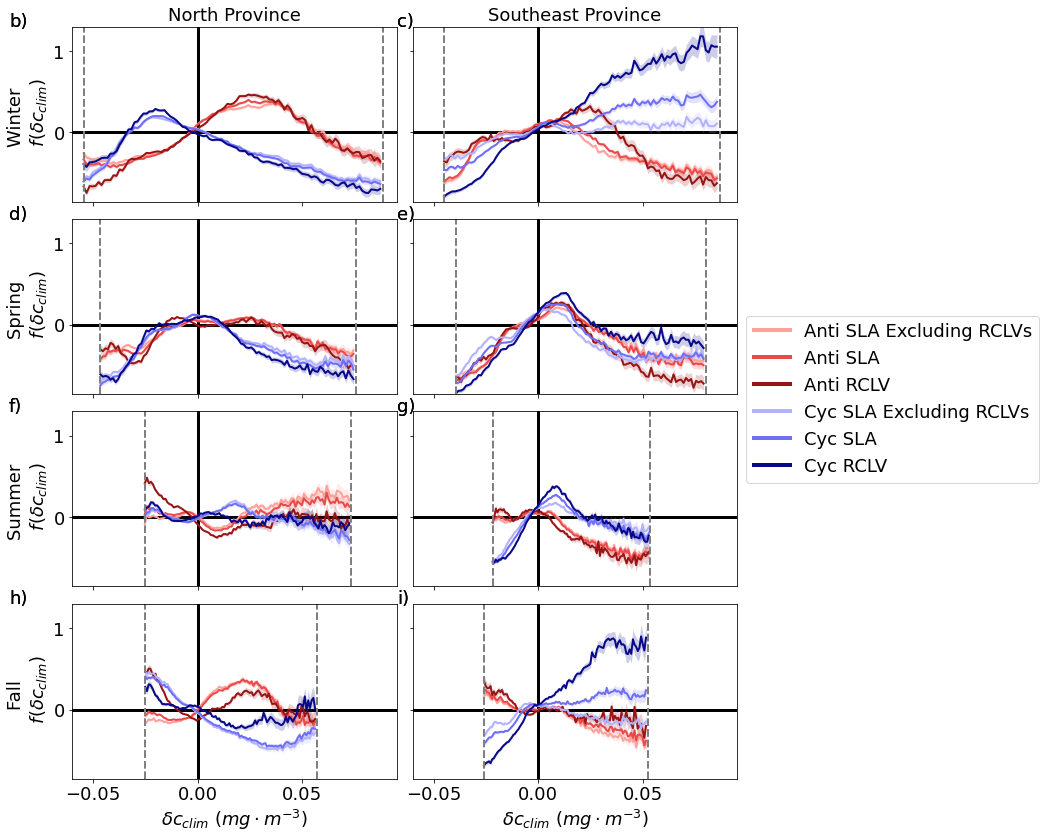

In [12]:
fig, ax = plt.subplots(4,2,figsize=(15,12))

print('ANTI')
all_bg_quant_mins, all_bg_quant_maxes = prob_dens_diff_plots('anti')

print('CYC')
all_bg_quant_mins, all_bg_quant_maxes = prob_dens_diff_plots('cyc')
plt.tight_layout()
plt.subplots_adjust(wspace=0.05,hspace=0.1)

save_dir = project_output_dir + 'RCLV_CHL_PAPER_FIGS/'
#plt.savefig(save_dir + 'north_southest_fclim_OS_r1.png', format='png', dpi=350)

#plt.show()

In [73]:
all_bg_quant_mins

{'1WINTER': -0.05444874793291092,
 '0WINTER': -0.04505015417933464,
 '1SPRING': -0.04643414504826069,
 '0SPRING': -0.03930687867105007,
 '1SUMMER': -0.025203989148139955,
 '0SUMMER': -0.021813537143170834,
 '1FALL': -0.02499045617878437,
 '0FALL': -0.025972803086042405}

In [74]:
all_bg_quant_maxes

{'1WINTER': 0.08871151030063651,
 '0WINTER': 0.0865511184930795,
 '1SPRING': 0.07568467698991285,
 '0SPRING': 0.08007102869451091,
 '1SUMMER': 0.07346712440252307,
 '0SUMMER': 0.053452729992568476,
 '1FALL': 0.056947922334074974,
 '0FALL': 0.052163537070155114}

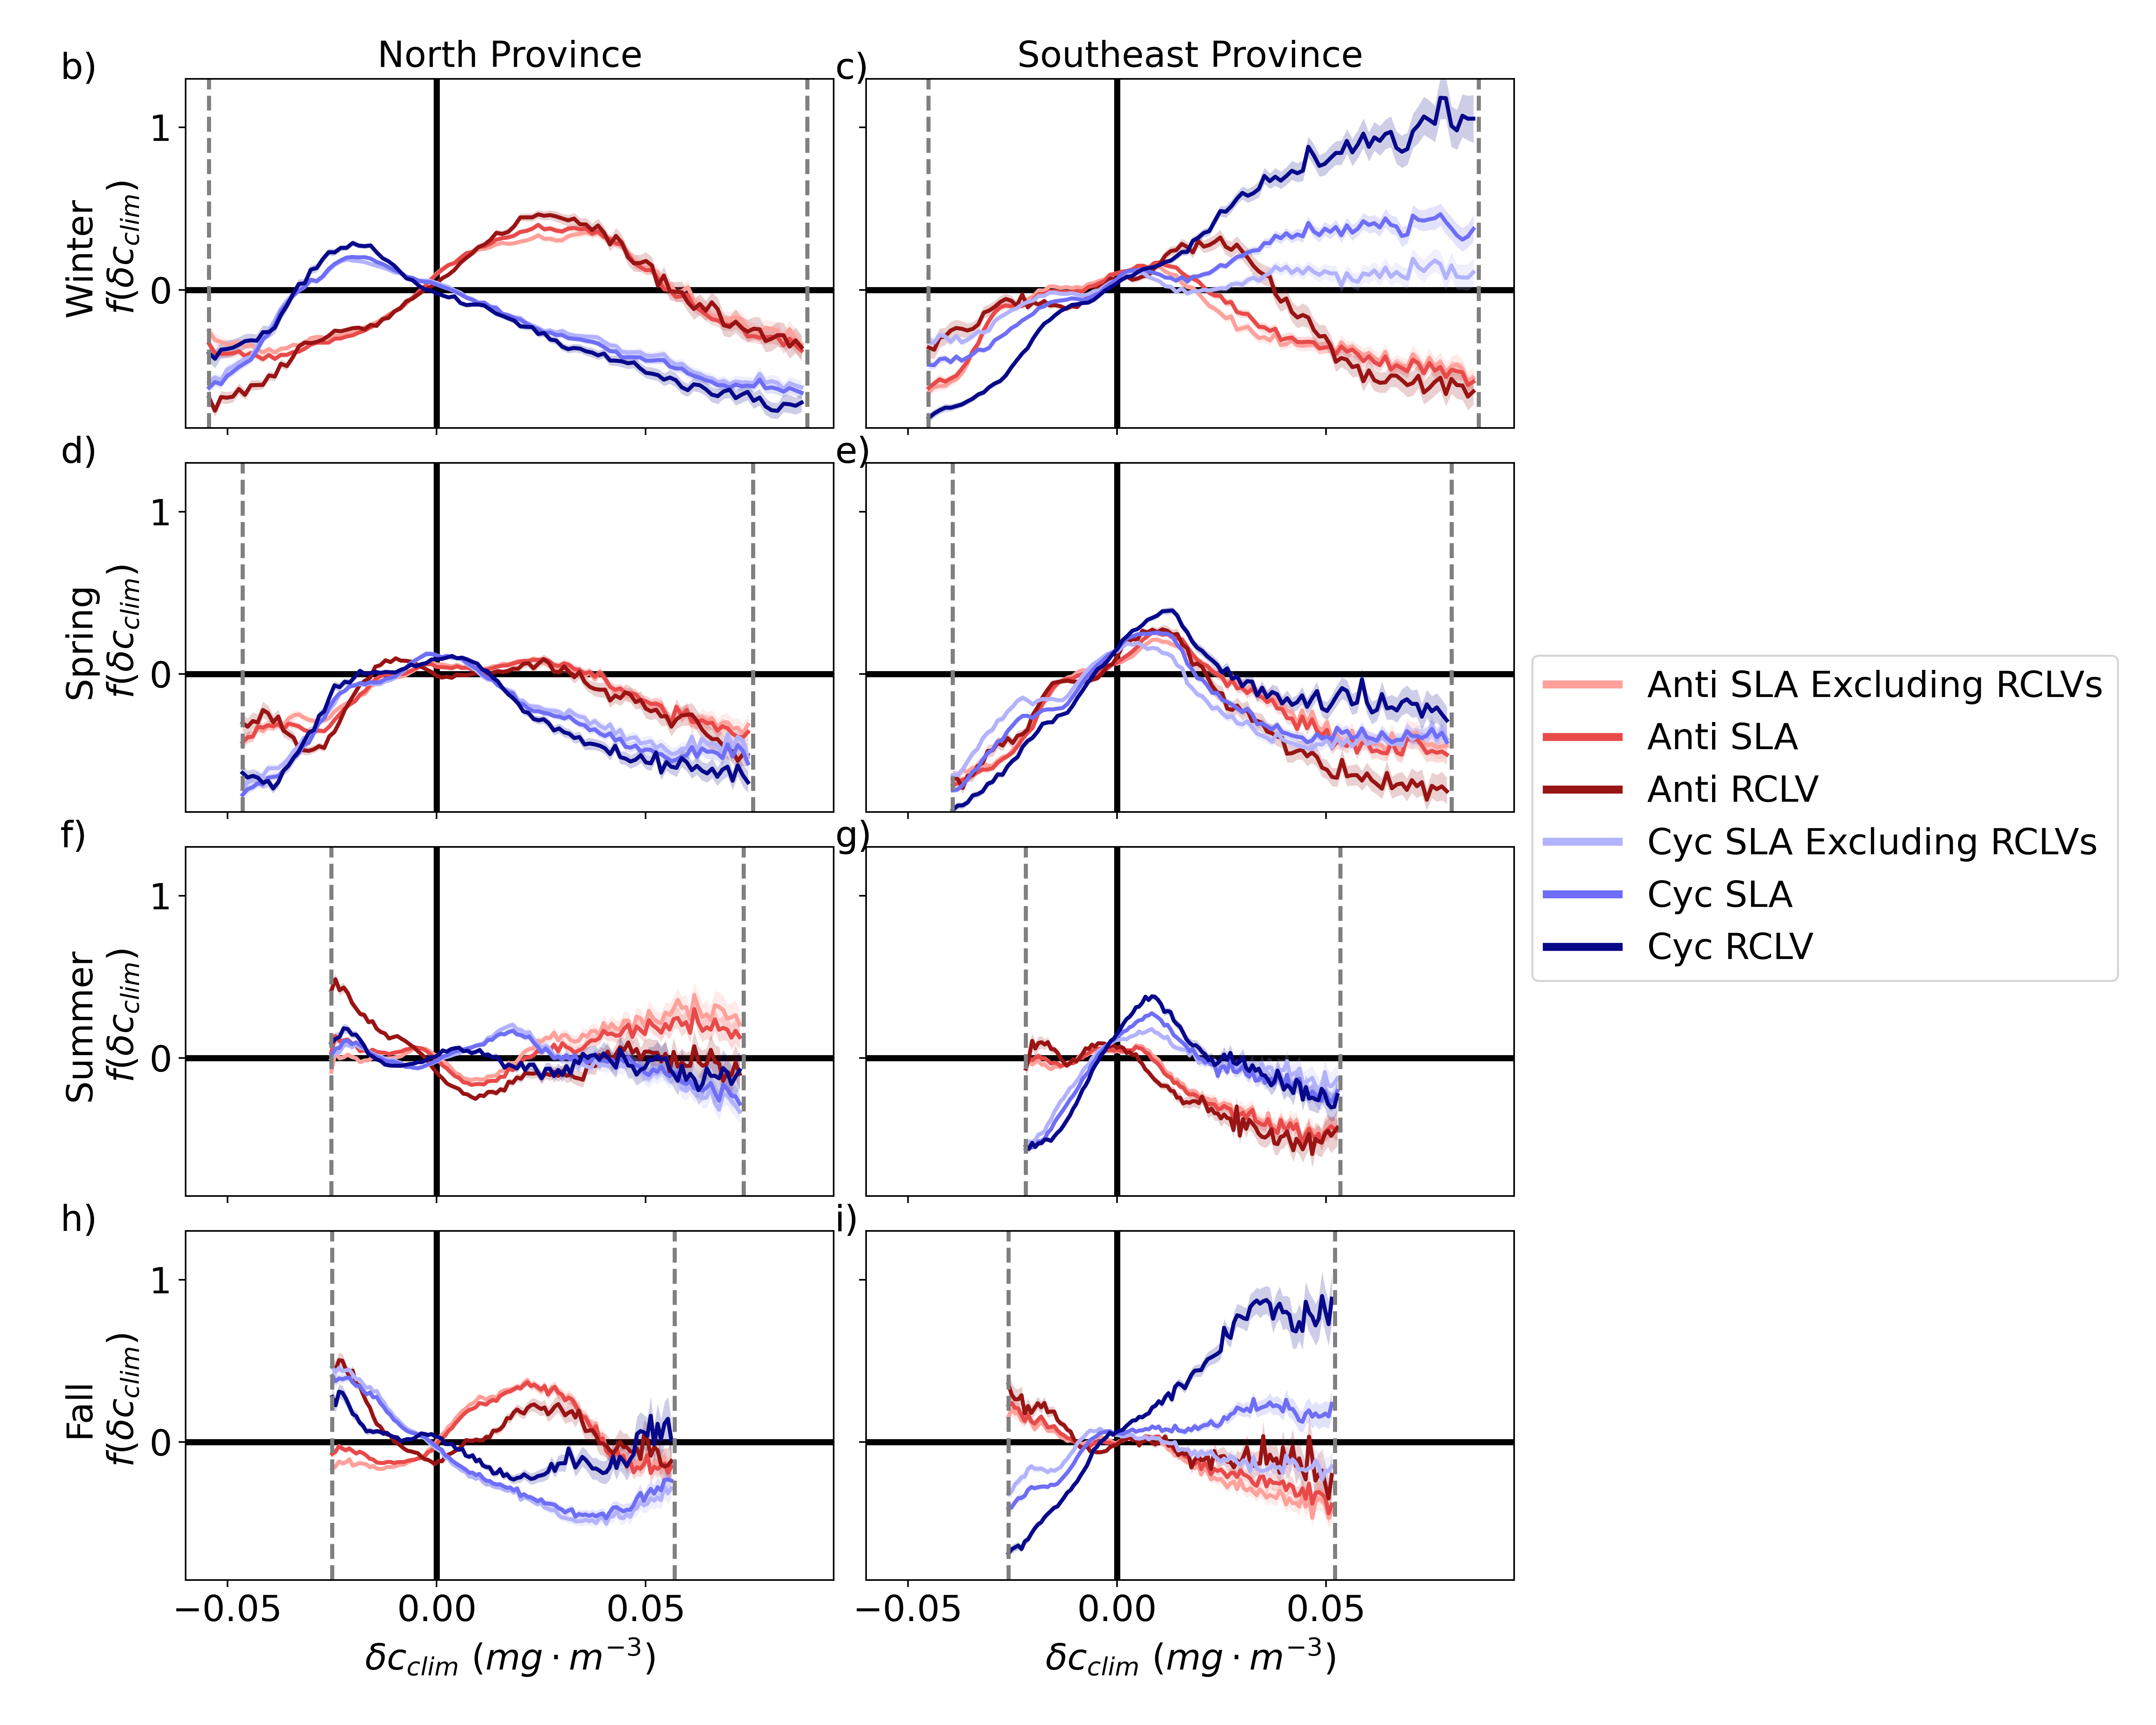

In [13]:
display(Image(filename=save_dir + 'north_southest_fclim_OS_r1.png'))

In [59]:
def hist_plots(polarity,range_min,range_max):

    #### SET UP PLOT ####
    fig, ax = plt.subplots(4,2,figsize=(15,12))

    fontsize = 18 
    linewidth = 2
    num_bins = 100
    dot_size= 200
    
    if polarity == 'anti':
        pol_str = 'Anti'
        colors = anti_colors
    elif polarity == 'cyc':
        pol_str = 'Cyc'
        colors = cyc_colors
        
    labels = ['%s SLA \n Excluding RCLVs'%(pol_str),'%s SLA'%(pol_str),'%s RCLV'%(pol_str)]
    quantiles = [0.01,0.05,0.25,0.5,0.75,0.95,0.99]
    
    ###### LOAD & PLOT THE DATA #####
    data_dir = project_output_dir + 'eddy_masks_and_chl_2000_to_2020/chl_feature_bins_eddy_provinces/'
    
    s = 0
    for season in ['WINTER','SPRING','SUMMER','FALL']:   
        p = 0
        for province in [1,0]:
            #### Province key #### 0: SE, 1: Northern lats, 2: Upper cyclonic lee eddies, 3: Lower anticyclonic lee eddies
            
            bg_chl = np.load(data_dir + '%s_bg_chl_clim_anom_p%s.npy'%(season,province))
            SLA_only_chl = np.load(data_dir + '%s_SSH_%s_chl_clim_anom_p%s.npy'%(season,polarity,province))
            RCLV_only_chl = np.load(data_dir + '%s_coh_%s_chl_clim_anom_p%s.npy'%(season,polarity,province))
            overlap_chl = np.load(data_dir + '%s_SSH_coh_%s_chl_clim_anom_p%s.npy'%(season,polarity,province))
            
            SLA_CHL = np.concatenate((SLA_only_chl,overlap_chl))
            RCLV_CHL = np.concatenate((RCLV_only_chl,overlap_chl))
            datasets = [SLA_only_chl,SLA_CHL,RCLV_CHL]
            
            bg_quant_min,bg_quant_max = np.quantile(bg_chl,0.001),np.quantile(bg_chl,0.999)
            bg_quants = [np.quantile(bg_chl,q) for q in quantiles]
            bg_counts,bg_bins,bg_bars = ax[s,p].hist(bg_chl,bins=num_bins,histtype="step",density=True,range=(bg_quant_min,bg_quant_max),color=bg_color,label='Background',linewidth=linewidth)
            
            # Hists
            for a in np.arange(0,len(datasets)):        
                ax[s,p].hist(datasets[a],bins=num_bins,histtype="step",density=True,range=(bg_quant_min,bg_quant_max),color=colors[a],linewidth=linewidth,label=labels[a])

                for q in np.arange(0,len(quantiles)):
                    ax[s,p].axvline(bg_quants[q],linewidth=linewidth,linestyle='--',color=bg_color,zorder=0)
                    y = 55+(a*3)
                    ax[s,p].scatter(np.quantile(datasets[a],quantiles[q]),y,color=colors[a],marker='.',s=dot_size,edgecolors='k')
                    ax[s,p].plot([bg_quants[q],np.quantile(datasets[a],quantiles[q])],[y,y],zorder=0,c='gray')
                    if s == 0: # only plot percentages for first row
                        ax[s,p].text(bg_quants[q],68,'%s%%'%(round(quantiles[q]*100)),fontsize=fontsize-3,
                                     horizontalalignment='center',rotation='vertical',color=bg_color)
                    else:
                        ax[s,p].text(bg_quants[q],68,'%s'%(round(quantiles[q]*100)),fontsize=fontsize-3,
                                     horizontalalignment='center',rotation='vertical',color=bg_color)
            p += 1
        s += 1
        
    ###### PLOT PARAMS ##### 
    ax[0,0].set_ylabel('Winter \n Probability Density')
    ax[1,0].set_ylabel('Spring \n Probability Density')
    ax[2,0].set_ylabel('Summer \n Probability Density')
    ax[3,0].set_ylabel('Fall \n Probability Density')
    
    ax[0,0].set_title('North Province',pad=40)
    ax[0,1].set_title('Southeast Province',pad=40)
    
    for i in np.arange(0,4):
        for j in np.arange(0,2):
            if (j != 0):
                ax[i,j].set_yticklabels([])
                
            if (i != 3):
                ax[i,j].set_xticklabels([])
              
            ax[i,j].set_xlim([-0.06,0.12])
            ax[i,j].set_ylim([0,65])
            ax[i,j].axvline(0,color='k',linewidth=linewidth,zorder=0) #vertical 0 line
            
            ax[3,j].set_xlabel('$\delta c_{clim}$ ($mg \cdot m^{-3}$)')
               
    leftx = -0.1
    rightx = -0.0675
    y = 65
    
    ax[0,0].text(leftx,y,'a)')
    ax[0,1].text(rightx,y,'b)')
    ax[1,0].text(leftx,y,'c)')
    ax[1,1].text(rightx,y,'d)')
    ax[2,0].text(leftx,y,'e)')
    ax[2,1].text(rightx,y,'f)')
    ax[3,0].text(leftx,y,'g)')
    ax[3,1].text(rightx,y,'h)')
    
    # Add anchored legend
    leg = ax[1,1].legend(bbox_to_anchor=(1, 0.4)) # bbox_to_anchor (x,y)
    for legobj in leg.legendHandles:
        legobj.set_linewidth(3)
        
    plt.tight_layout()
    plt.subplots_adjust(wspace=0.05,hspace=0.2)

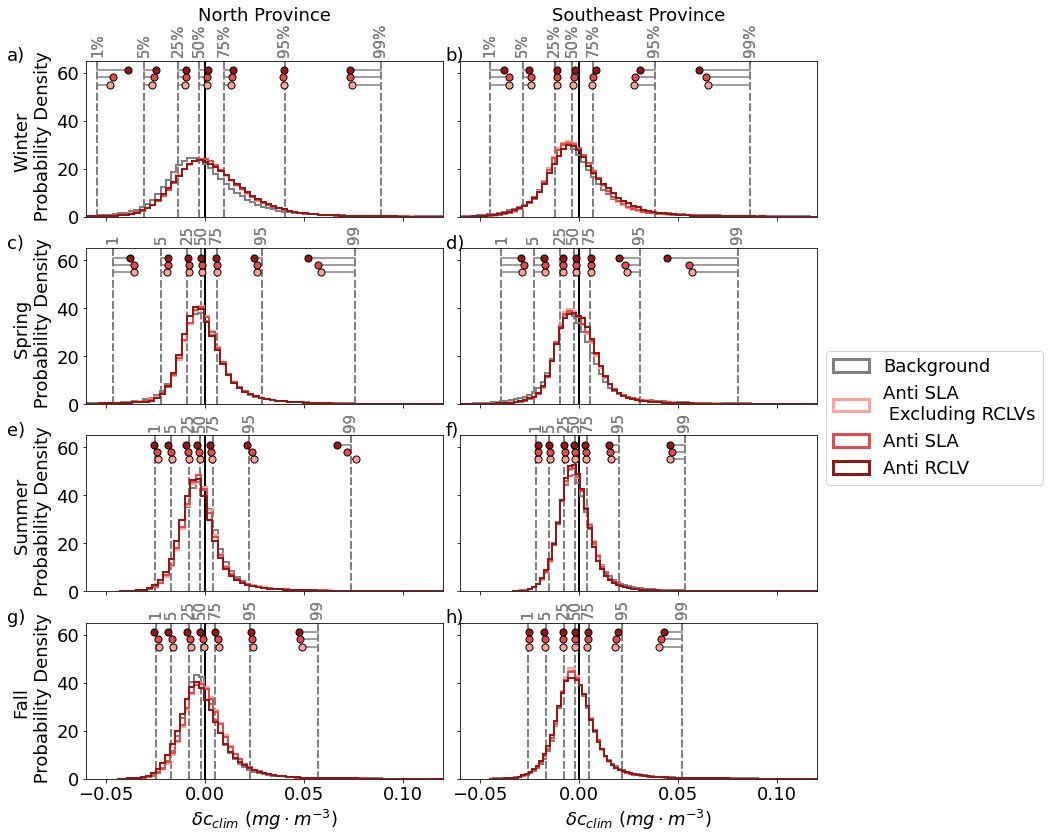

In [60]:
hist_plots('anti',range_min,range_max)

save_dir = project_output_dir + 'RCLV_CHL_PAPER_FIGS/'
#plt.savefig(save_dir + 'north_southeast_anti_PDD_r1.png', format='png', dpi=350)

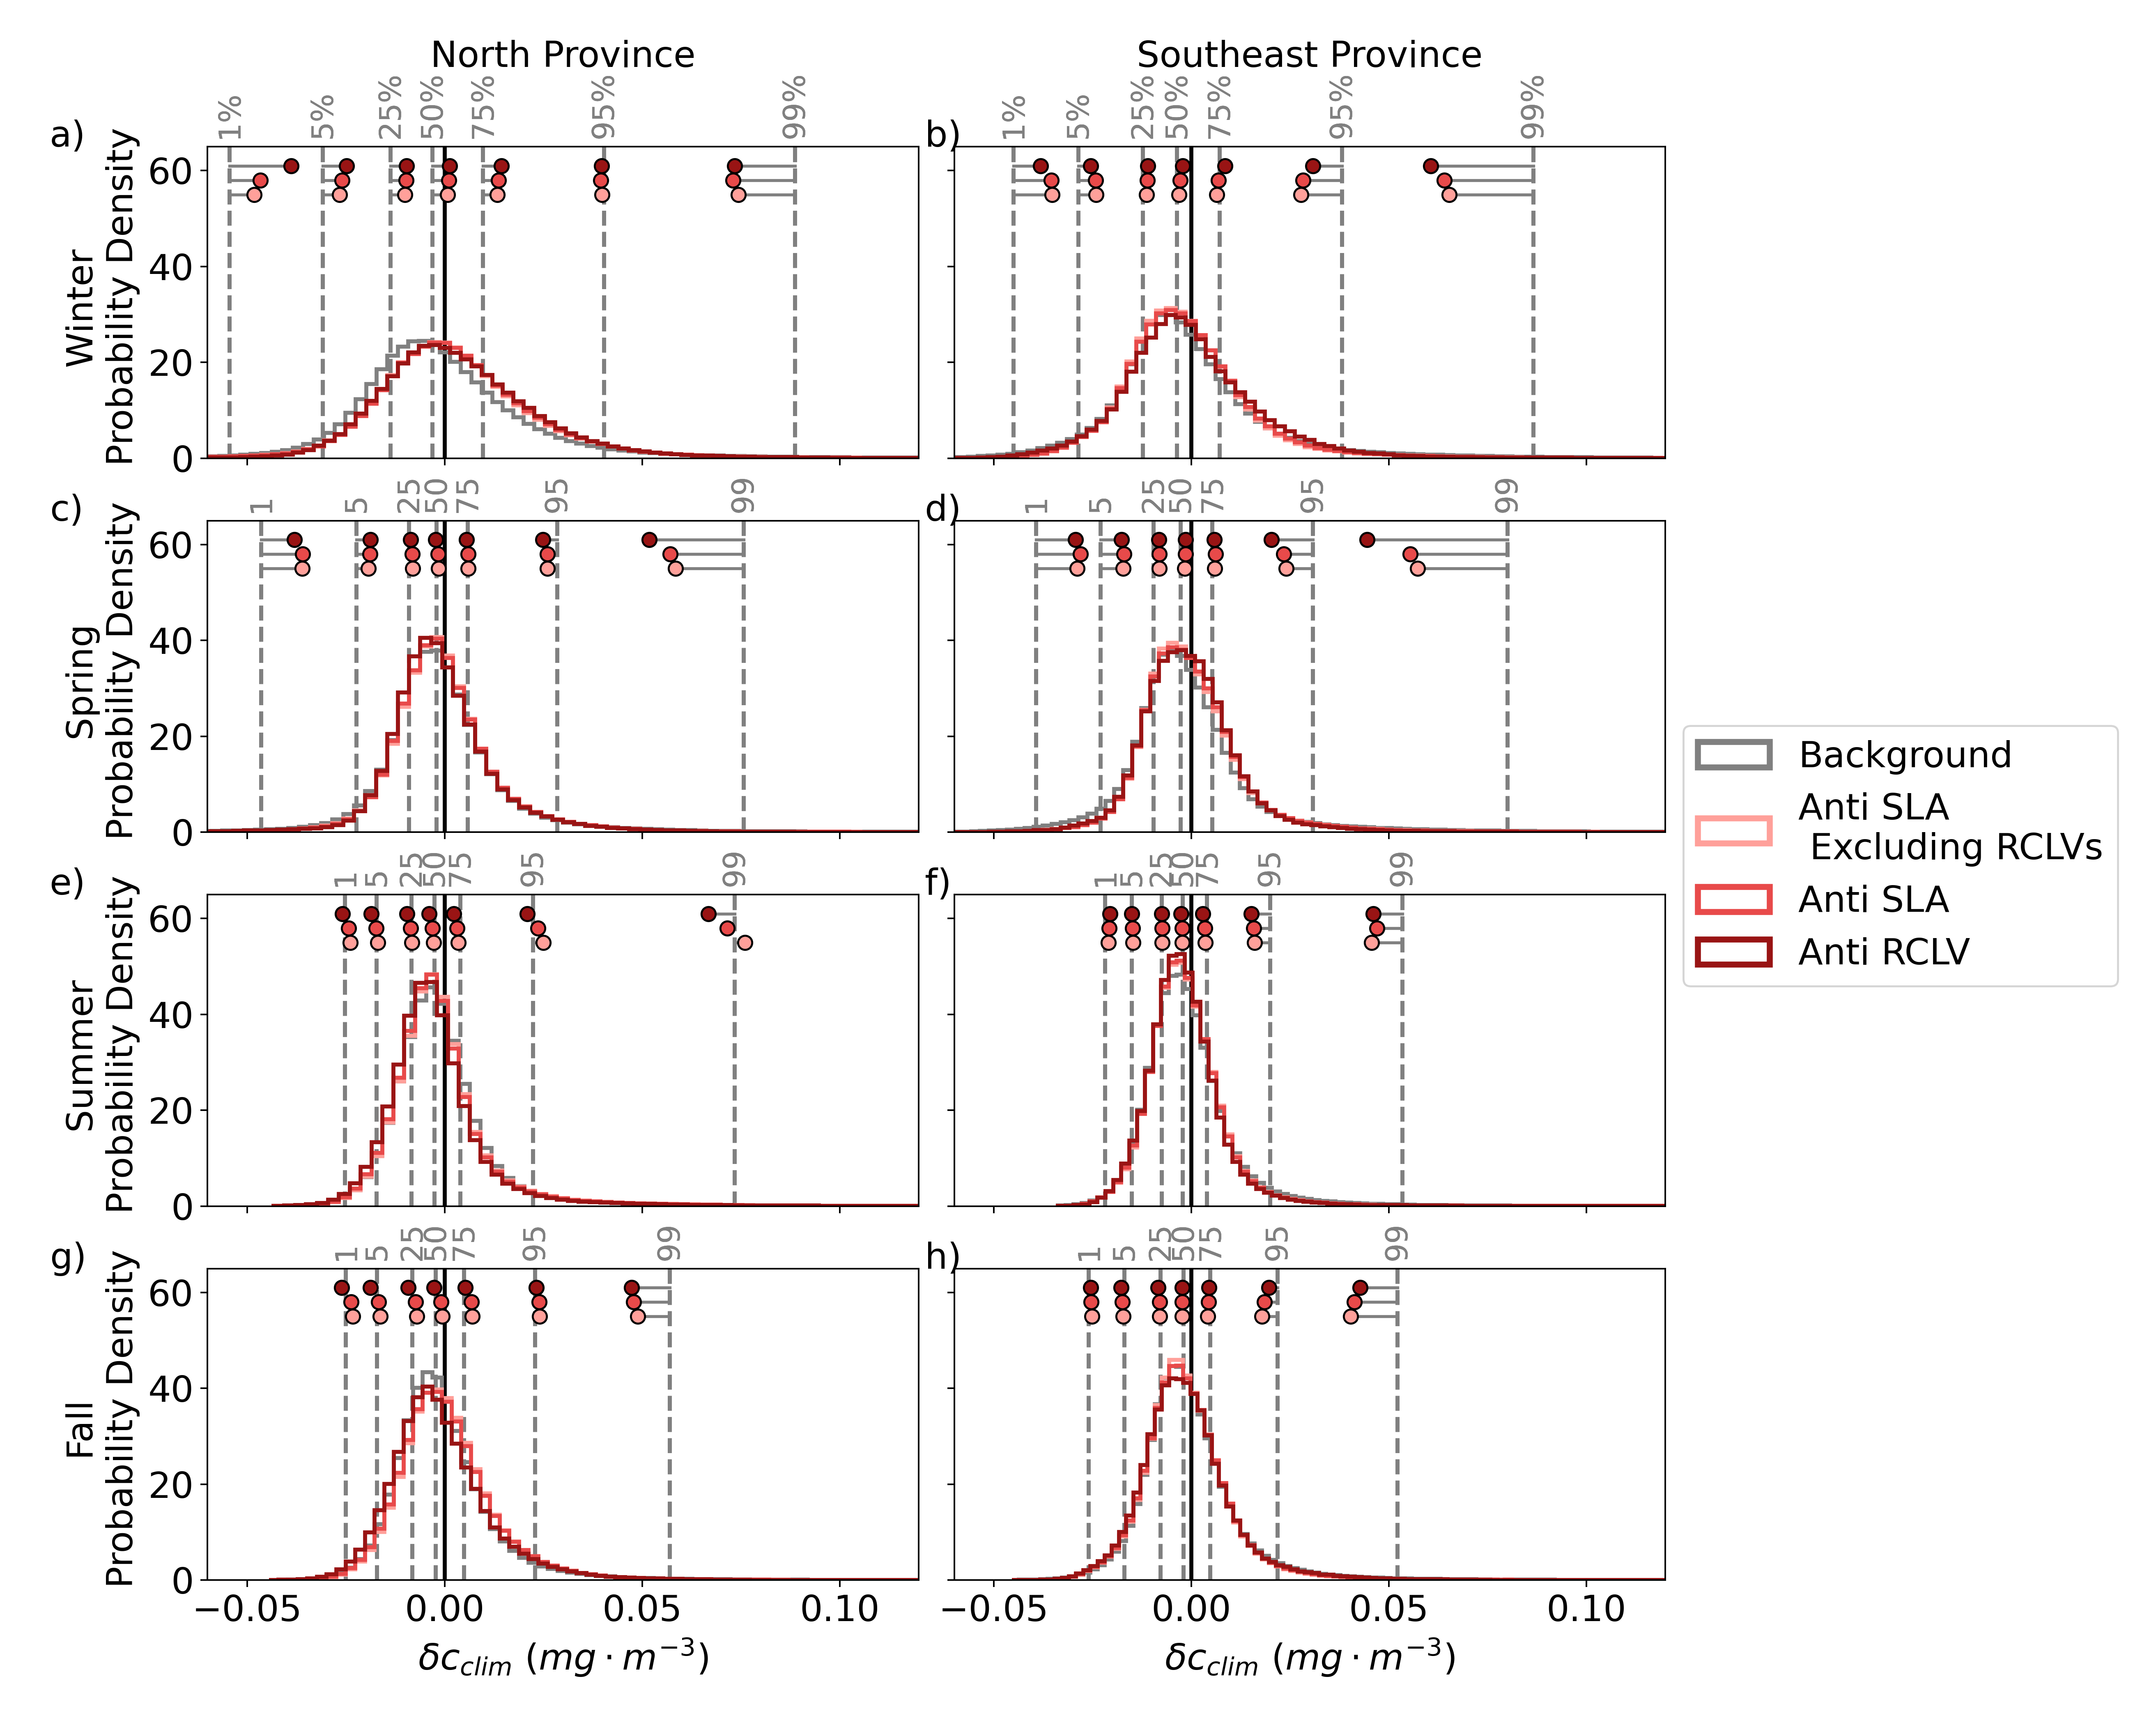

In [61]:
display(Image(filename=save_dir + 'north_southeast_anti_PDD_r1.png'))

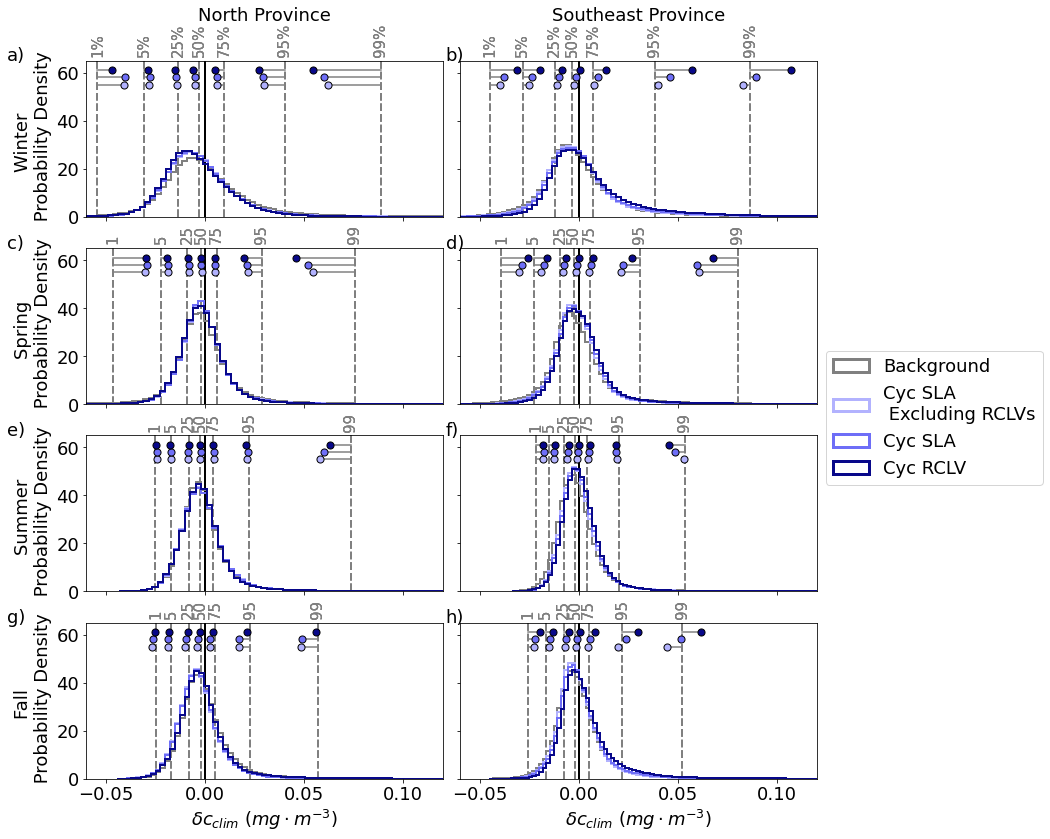

In [62]:
hist_plots('cyc',range_min,range_max)
#plt.savefig(save_dir + 'north_southeast_cyc_PDD_r1.png', format='png', dpi=350)

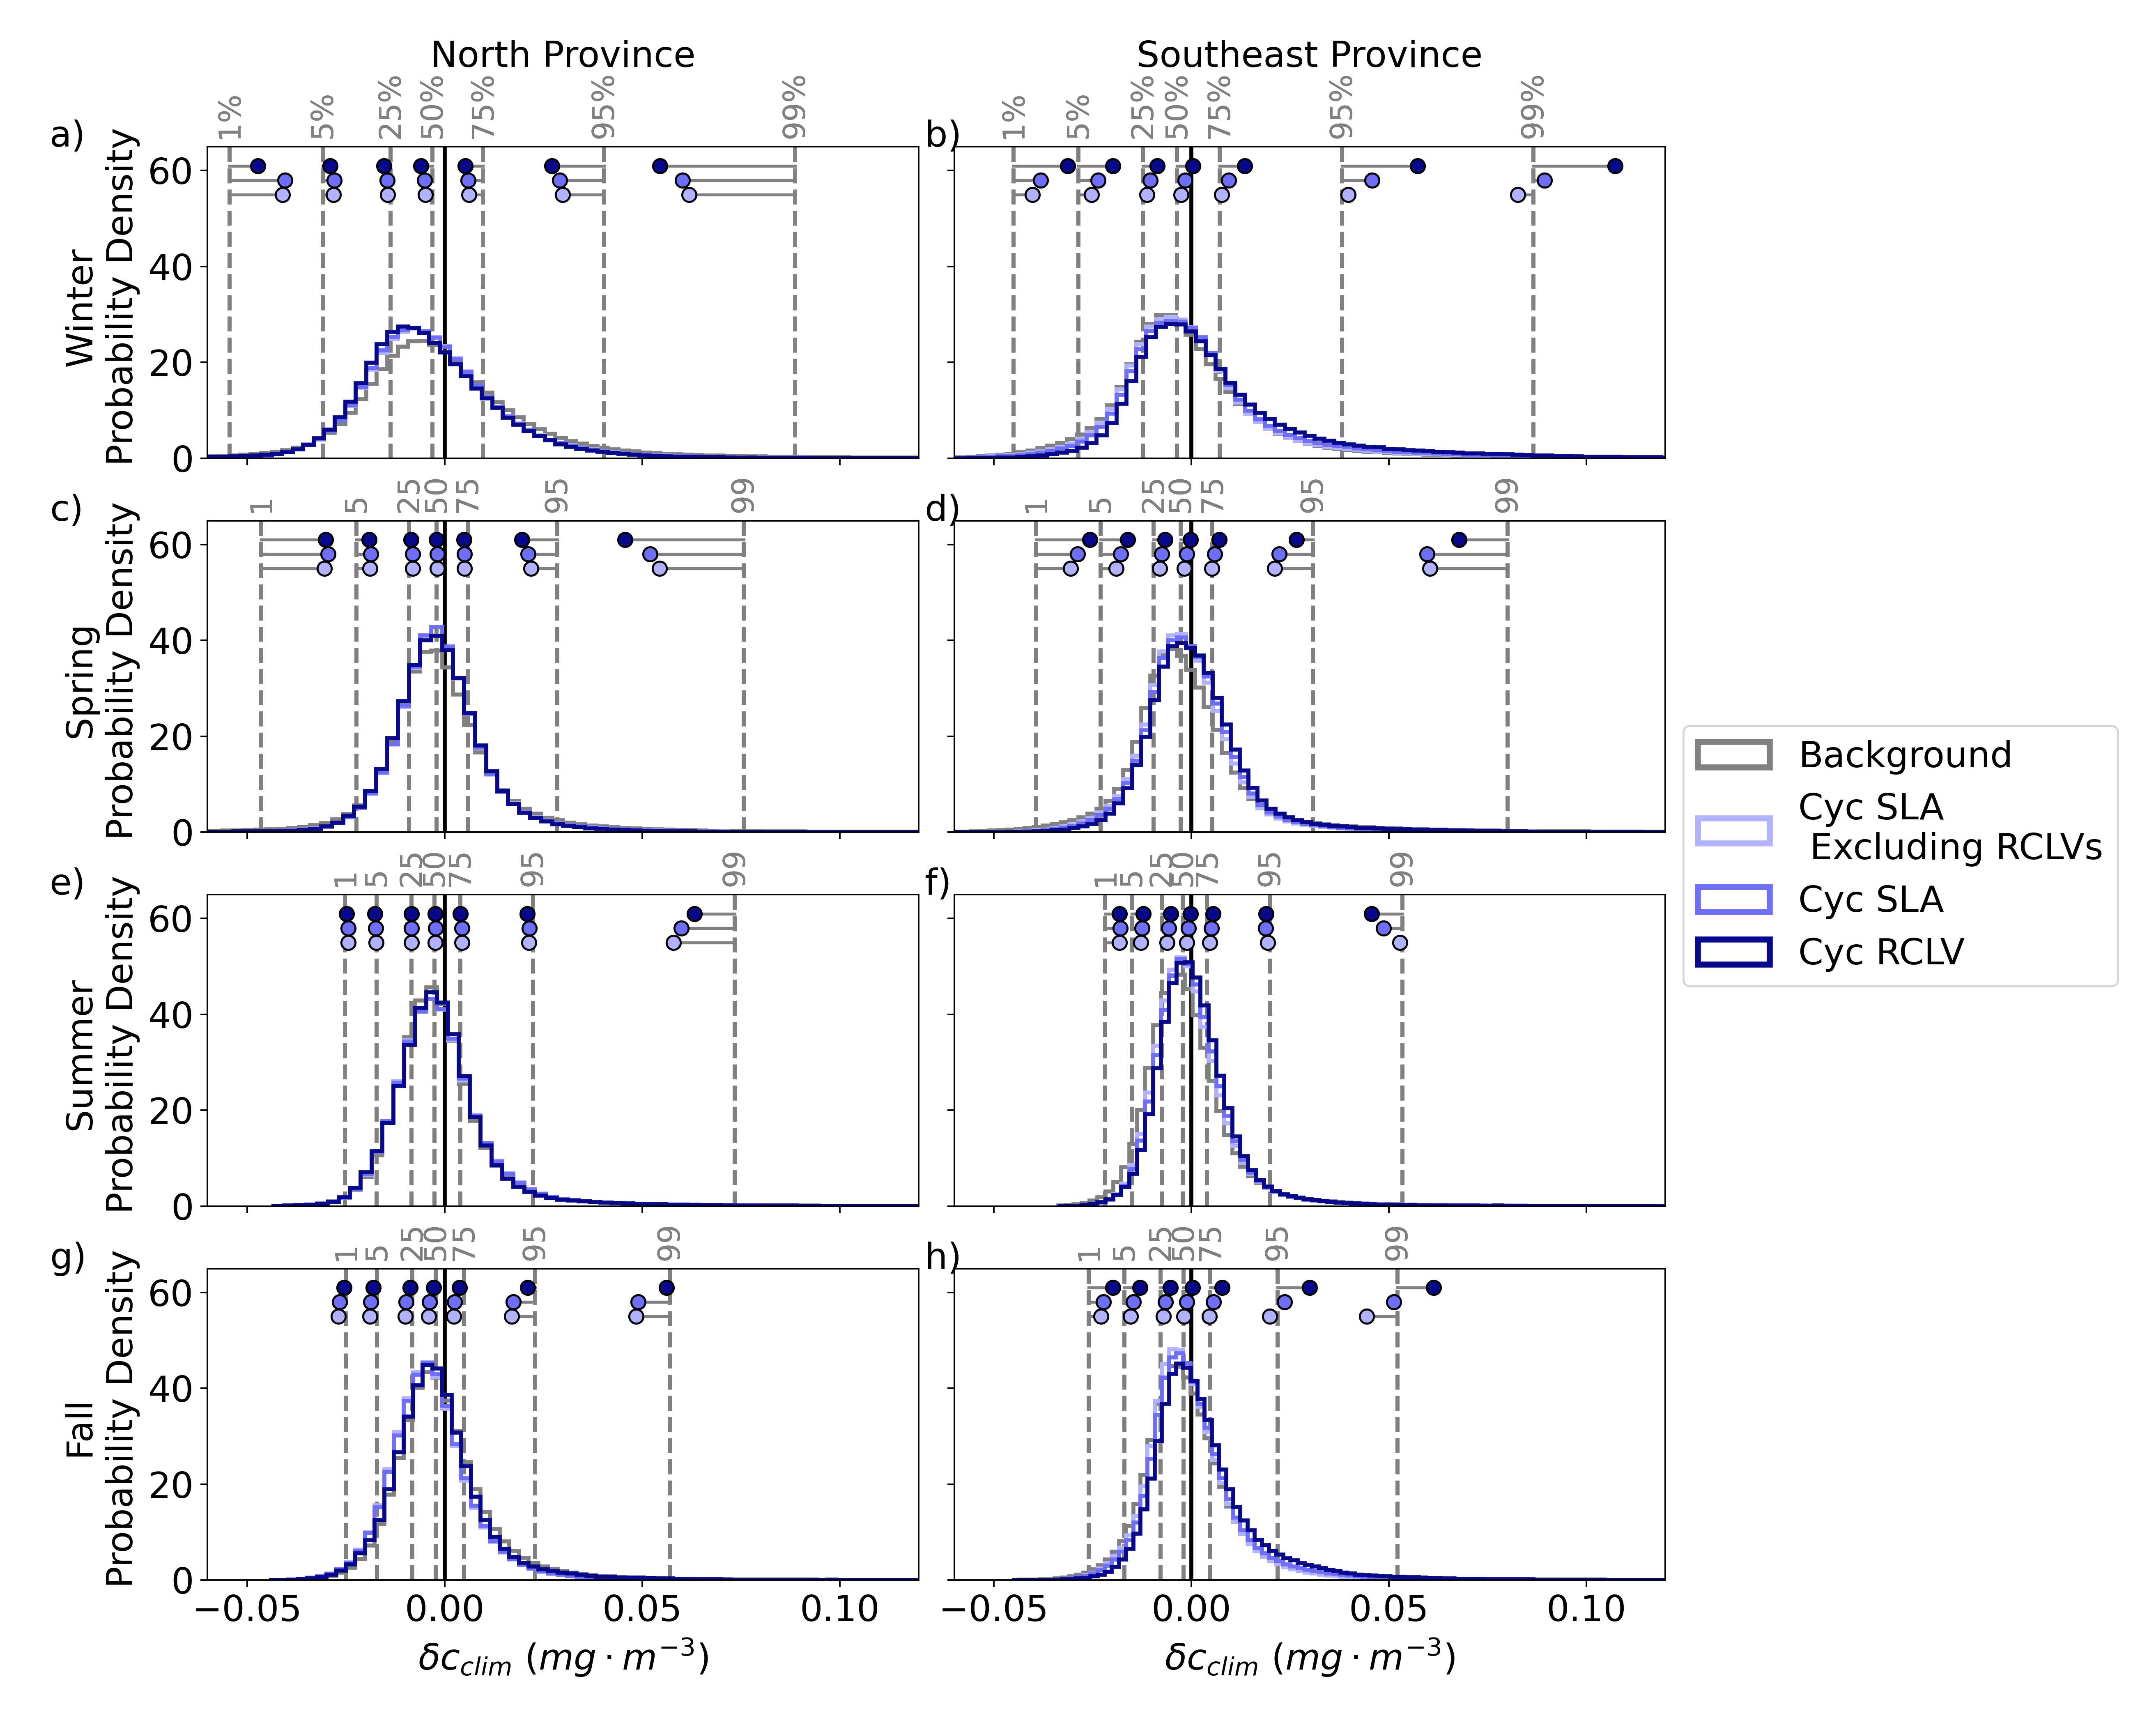

In [63]:
display(Image(filename=save_dir + 'north_southeast_cyc_PDD_r1.png'))

## Lee Eddy Plot

In [29]:
def lee_prob_dens_diff_plots(polarity,range_min,range_max):
    """
    polarity: 'anti' or 'cyc'
    """

    #### SET UP PLOT ####
    fontsize = 18 
    linewidth = 2
    num_bins = 100
    
    if polarity == 'anti':
        pol_str = 'Anti'
        colors = anti_colors
    elif polarity == 'cyc':
        pol_str = 'Cyc'
        colors = cyc_colors
        
    labels = ['%s SLA Excluding RCLVs'%(pol_str),'%s SLA'%(pol_str),'%s RCLV'%(pol_str)]
    data_dir = project_output_dir + 'eddy_masks_and_chl_2000_to_2020/chl_feature_bins_eddy_provinces/'
    
    ###### LOAD & PLOT THE DATA #####
    s = 0
    for season in ['WINTER','SPRING','SUMMER','FALL']:   
        
        #### Province key #### 0: SE, 1: Northern lats, 2: Upper cyclonic lee eddies, 3: Lower anticyclonic lee eddies
        bg_chl = np.concatenate((np.load(data_dir + '%s_bg_chl_clim_anom_p%s.npy'%(season,2)),np.load(data_dir + '%s_bg_chl_clim_anom_p%s.npy'%(season,3))))
        SLA_only_chl = np.concatenate((np.load(data_dir + '%s_SSH_%s_chl_clim_anom_p%s.npy'%(season,polarity,2)),np.load(data_dir + '%s_SSH_%s_chl_clim_anom_p%s.npy'%(season,polarity,3))))
        RCLV_only_chl = np.concatenate((np.load(data_dir + '%s_coh_%s_chl_clim_anom_p%s.npy'%(season,polarity,2)),np.load(data_dir + '%s_coh_%s_chl_clim_anom_p%s.npy'%(season,polarity,3))))
        overlap_chl = np.concatenate((np.load(data_dir + '%s_SSH_coh_%s_chl_clim_anom_p%s.npy'%(season,polarity,2)),np.load(data_dir + '%s_SSH_coh_%s_chl_clim_anom_p%s.npy'%(season,polarity,3))))
        
        SLA_CHL = np.concatenate((SLA_only_chl,overlap_chl))
        RCLV_CHL = np.concatenate((RCLV_only_chl,overlap_chl))
        datasets = [SLA_only_chl,SLA_CHL,RCLV_CHL]
                    
        # Background data (need this to subtract and set bounds)
        bg_quant_min,bg_quant_max = np.quantile(bg_chl,0.01),np.quantile(bg_chl,0.99)
        all_bg_quant_mins['23'+season] = bg_quant_min
        all_bg_quant_maxes['23'+season] = bg_quant_max
        bg_counts,bg_bins = np.histogram(bg_chl,bins=num_bins,density=True,range=(bg_quant_min,bg_quant_max))
        
        # Load bootstrap results
        bootstrap_dir = project_output_dir + 'eddy_masks_and_chl_2000_to_2020/chl_feature_bins_eddy_provinces/bootstrap_error/' 
            
        CI_min,CI_max = [],[]
        if polarity == 'anti':
            temp_labels = ['Anti_SLA_Excluding RCLVs','Anti_SLA','Anti_RCLV']
            for a in temp_labels:
                CI_min.append(np.load(bootstrap_dir + 'fdclim_bootstrap_1000_resample_2.5p_%s_%s_Lee.npy'%(a,season)))
                CI_max.append(np.load(bootstrap_dir + 'fdclim_bootstrap_1000_resample_97.5p_%s_%s_Lee.npy'%(a,season)))
            
        elif polarity == 'cyc':
            temp_labels = ['Cyc_SLA_Excluding_RCLVs','Cyc_SLA','Cyc_RCLV']
            for a in temp_labels:
                CI_min.append(np.load(bootstrap_dir + 'fdclim_bootstrap_1000_resample_2.5p_%s_%s_Lee.npy'%(a,season)))
                CI_max.append(np.load(bootstrap_dir + 'fdclim_bootstrap_1000_resample_97.5p_%s_%s_Lee.npy'%(a,season)))
            
        ##################################### PLOT #####################################
            
        # Lineplots
        for a in np.arange(0,len(datasets)):        
            counts,bins = np.histogram(datasets[a],bins=num_bins,density=True,range=(bg_quant_min,bg_quant_max))
            
            y_vals = (counts-bg_counts)/bg_counts
            
            # Bootstrap confidence interval
            ax[s,0].fill_between(bg_bins[:-1],CI_min[a],CI_max[a],color=colors[a],alpha=0.2,linewidth=0)
            ax[s,0].plot(bg_bins[:-1],y_vals,c=colors[a],linewidth=linewidth,label=labels[a]) # difference plot
            
            if season == 'WINTER': # zoom in plot
                ax[s,1].plot(bg_bins[:-1],y_vals,c=colors[a],linewidth=linewidth,label=labels[a]) # difference plot
                ax[s,1].fill_between(bg_bins[:-1],CI_min[a],CI_max[a],color=colors[a],alpha=0.2,linewidth=0)
                
            # Vertical lines showing bounds
            ax[s,0].axvline(bg_quant_min,linewidth=linewidth,linestyle='--',color=bg_color) #1% quantile
            ax[s,0].axvline(bg_quant_max,linewidth=linewidth,linestyle='--',color=bg_color) #99% quantile
            
            y_max = np.max(y_vals)
            chl_anom_y_max = bg_bins[:-1][np.where(y_vals==y_max)[0][0]]
            print('%s %s Maximums: y=%s, x=%s'%(labels[a],season,y_max,chl_anom_y_max))
            
        ax[s,0].axvline(0,color='k',linewidth=linewidth+1,zorder=0) #vertical 0 line
        ax[s,0].axhline(0,color='k',linewidth=linewidth+1,zorder=0) #horizontal 0 line
            
        ax[s,0].set_xlim([-0.03,0.085])
        
        ax[s,0].set_ylim([-1,3])
        ax[s,0].set_axisbelow(True)
        ax[s,0].yaxis.grid(color='gray')
        ax[s,0].xaxis.grid(color='gray')
        
        if season == 'WINTER':
            
            ax[s,1].set_ylim([-1,10])
            ax[s,1].axvline(0,color='k',linewidth=linewidth+1,zorder=0) #vertical 0 line
            ax[s,1].axhline(0,color='k',linewidth=linewidth+1,zorder=0) #horizontal 0 line
            
            ax[s,1].set_xlim([-0.03,0.085])
            ax[s,1].tick_params(axis='both',which='major',labelsize=fontsize)
            
            # Vertical lines showing bounds
            ax[s,1].axvline(bg_quant_min,linewidth=linewidth,linestyle='--',color=bg_color) #1% quantile
            ax[s,1].axvline(bg_quant_max,linewidth=linewidth,linestyle='--',color=bg_color) #99% quantile
            
        s += 1
        
    ###### PLOT PARAMS ##### 
    ax[0,0].set_ylabel('Winter \n $\it{f}(\delta c_{clim}$)')
    ax[1,0].set_ylabel('Spring \n $\it{f}(\delta c_{clim}$)')
    ax[2,0].set_ylabel('Summer \n $\it{f}(\delta c_{clim}$)')
    ax[3,0].set_ylabel('Fall \n $\it{f}(\delta c_{clim}$)')

    #plt.suptitle('Lee Eddy Province',fontsize=fontsize)
    ax[0,1].set_xlabel('$\delta c_{clim}$ ($mg \cdot m^{-3}$)')
    ax[3,0].set_xlabel('$\delta c_{clim}$ ($mg \cdot m^{-3}$)')
    
    for i in np.arange(0,3):
        ax[i,0].set_xticklabels([])
            
    leftx = -0.045
    lefty = 3
    ax[0,0].text(leftx,lefty,'b)',fontsize=fontsize)
    ax[0,1].text(-0.05,10,'c)',fontsize=fontsize)
    ax[1,0].text(leftx,lefty,'d)',fontsize=fontsize)
    ax[2,0].text(leftx,lefty,'e)',fontsize=fontsize)
    ax[3,0].text(leftx,lefty,'f)',fontsize=fontsize)
                
    # Add anchored legend
    leg = ax[2,0].legend(bbox_to_anchor=(1.35, 1.0),fontsize=fontsize) # bbox_to_anchor (x,y)
    for legobj in leg.legendHandles:
        legobj.set_linewidth(4)
        
    ###### Turn off axes ##### 
    ax[1,1].axis('off')
    ax[2,1].axis('off')
    ax[3,1].axis('off')
    
    plt.tight_layout()
    plt.subplots_adjust(wspace=0.2,hspace=0.1)

Anti SLA Excluding RCLVs WINTER Maximums: y=1.8145137581213862, x=0.03189558
Anti SLA WINTER Maximums: y=3.9402024633460355, x=0.03189558
Anti RCLV WINTER Maximums: y=9.330019372404696, x=0.032434396
Anti SLA Excluding RCLVs SPRING Maximums: y=0.753028159299598, x=0.026103951
Anti SLA SPRING Maximums: y=1.0749517816671865, x=0.026103951
Anti RCLV SPRING Maximums: y=2.208569726057554, x=0.026530527
Anti SLA Excluding RCLVs SUMMER Maximums: y=0.6307831291207433, x=-0.02214421
Anti SLA SUMMER Maximums: y=0.45145909597434064, x=0.0142411385
Anti RCLV SUMMER Maximums: y=1.2501968781565367, x=0.021316068
Anti SLA Excluding RCLVs FALL Maximums: y=0.4916017858480375, x=-0.02172296
Anti SLA FALL Maximums: y=1.0264519653809747, x=0.031465452
Anti RCLV FALL Maximums: y=2.8703333299035263, x=0.036967702
Cyc SLA Excluding RCLVs WINTER Maximums: y=0.5261981010906985, x=-0.02090813
Cyc SLA WINTER Maximums: y=0.42596233842528775, x=0.031356767
Cyc RCLV WINTER Maximums: y=1.2682835293989025, x=0.031356

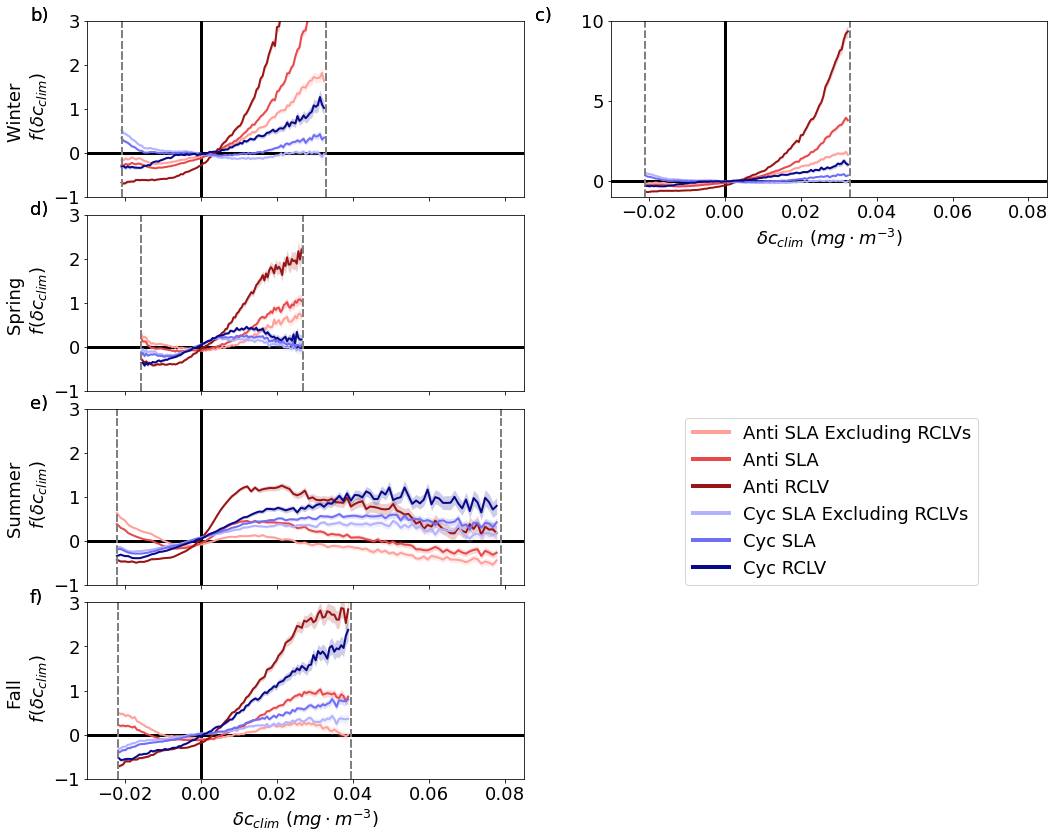

In [30]:
fig, ax = plt.subplots(4,2,figsize=(15,12))
lee_prob_dens_diff_plots('anti',range_min,range_max)
lee_prob_dens_diff_plots('cyc',range_min,range_max)

save_dir = project_output_dir + 'RCLV_CHL_PAPER_FIGS/'
#plt.savefig(save_dir + 'lee_eddy_fclim_OS_r1.png', format='png', dpi=350)

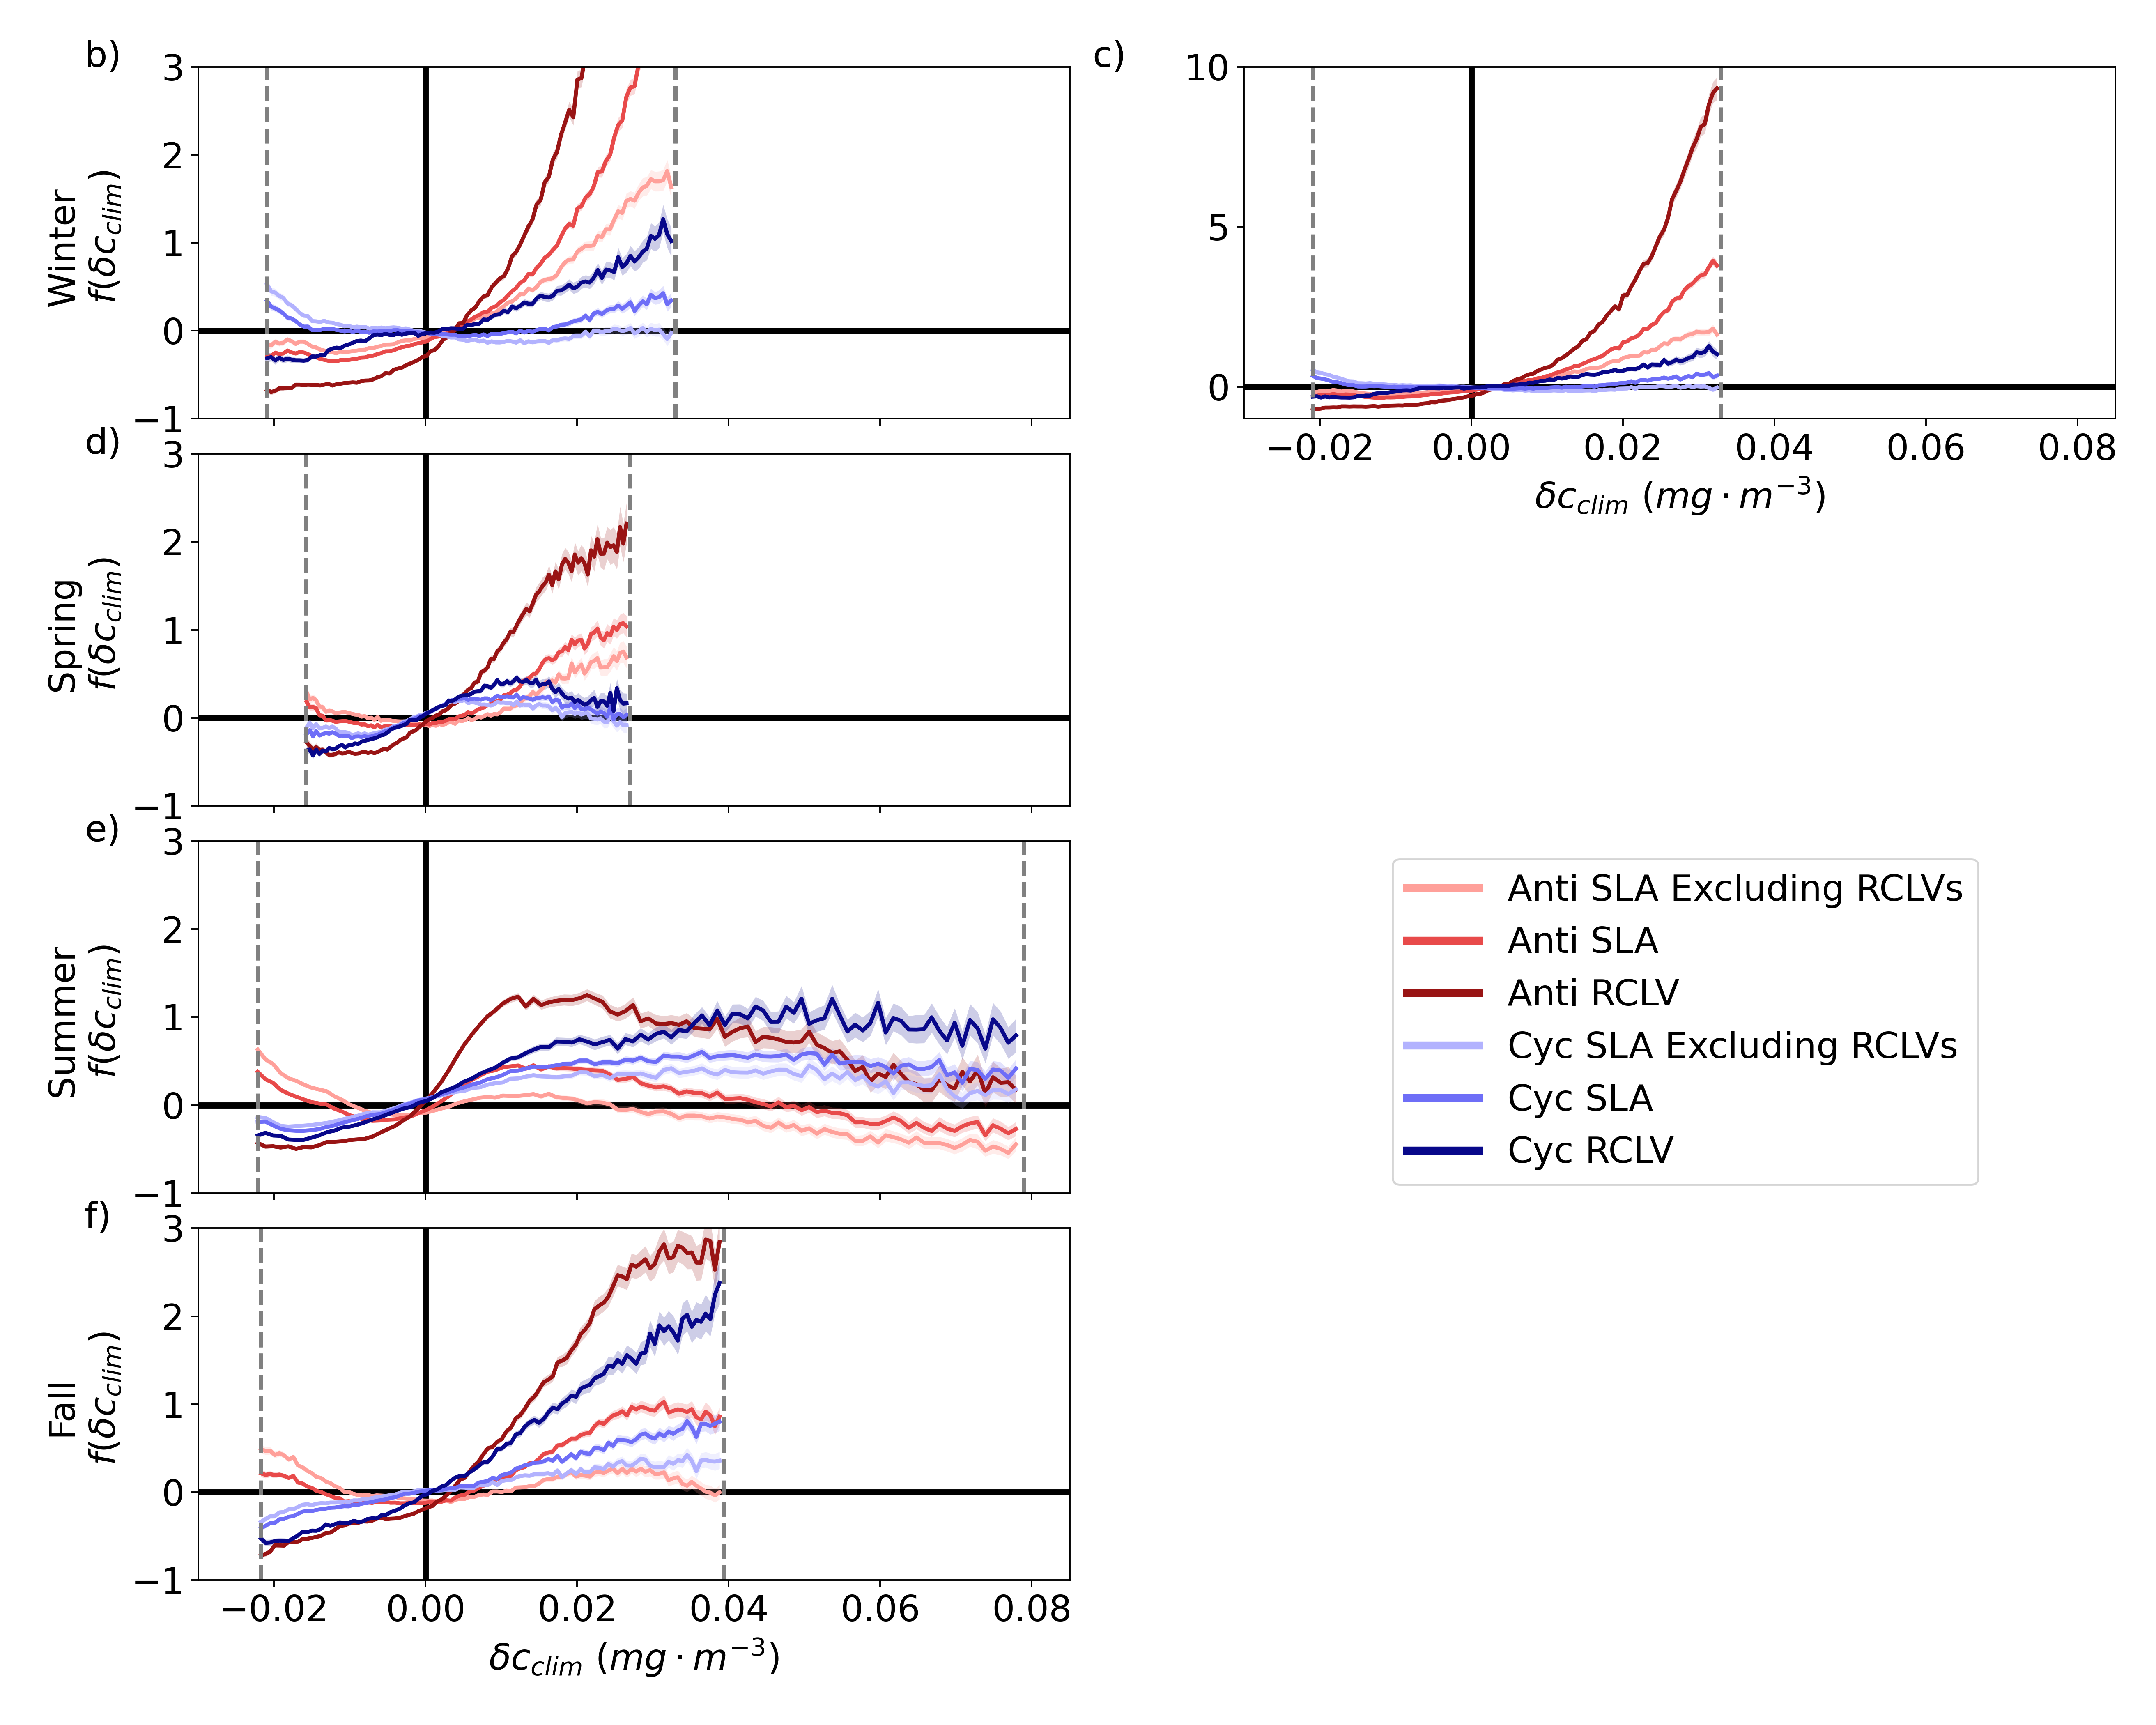

In [64]:
display(Image(filename=save_dir + 'lee_eddy_fclim_OS_r1.png'))

/home/jonesae/.conda/envs/py3_parcels_v2/lib/python3.6/site-packages/ipykernel_launcher.py:103: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations


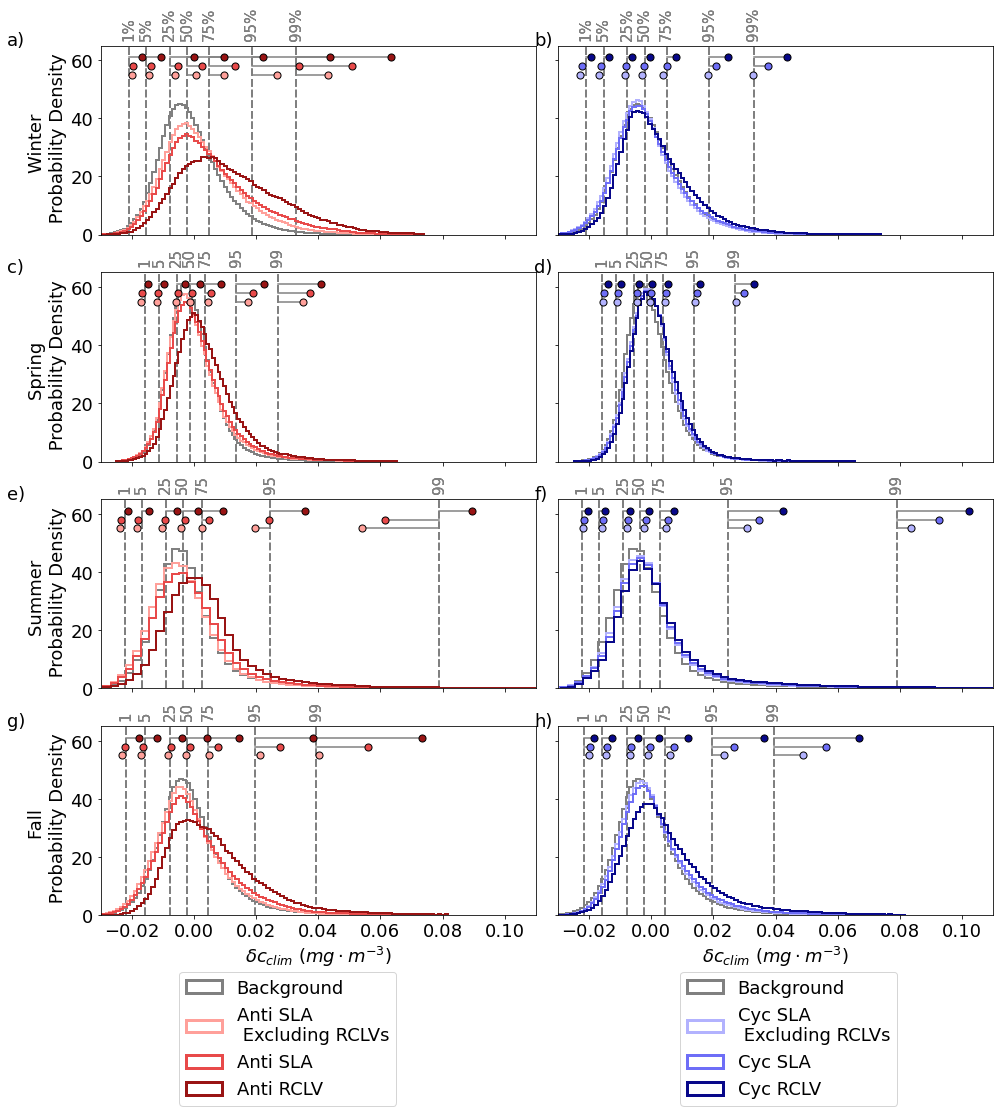

In [79]:
fig, ax = plt.subplots(4,2,figsize=(16,16))

#### SET UP PLOT ####
fontsize = 18 
linewidth = 2
num_bins = 100
dot_size= 200
    
data_dir = project_output_dir + 'eddy_masks_and_chl_2000_to_2020/chl_feature_bins_eddy_provinces/'    
quantiles = [0.01,0.05,0.25,0.5,0.75,0.95,0.99]
    
###### LOAD & PLOT THE DATA #####
s = 0
for season in ['WINTER','SPRING','SUMMER','FALL']:   
    p = 0
    for polarity in ['anti','cyc']:
        if polarity == 'anti':
            pol_str = 'Anti'
            colors = anti_colors
        elif polarity == 'cyc':
            pol_str = 'Cyc'
            colors = cyc_colors
        
        #### Province key #### 0: SE, 1: Northern lats, 2: Upper cyclonic lee eddies, 3: Lower anticyclonic lee eddies
        bg_chl = np.concatenate((np.load(data_dir + '%s_bg_chl_clim_anom_p%s.npy'%(season,2)),
                                 np.load(data_dir + '%s_bg_chl_clim_anom_p%s.npy'%(season,3))))
        SLA_only_chl = np.concatenate((np.load(data_dir + '%s_SSH_%s_chl_clim_anom_p%s.npy'%(season,polarity,2)),
                                  np.load(data_dir + '%s_SSH_%s_chl_clim_anom_p%s.npy'%(season,polarity,3))))
        RCLV_only_chl = np.concatenate((np.load(data_dir + '%s_coh_%s_chl_clim_anom_p%s.npy'%(season,polarity,2)),
                                  np.load(data_dir + '%s_coh_%s_chl_clim_anom_p%s.npy'%(season,polarity,3))))
        overlap_chl = np.concatenate((np.load(data_dir + '%s_SSH_coh_%s_chl_clim_anom_p%s.npy'%(season,polarity,2)),
                                      np.load(data_dir + '%s_SSH_coh_%s_chl_clim_anom_p%s.npy'%(season,polarity,3))))

        SLA_CHL = np.concatenate((SLA_only_chl,overlap_chl))
        RCLV_CHL = np.concatenate((RCLV_only_chl,overlap_chl))
        datasets = [SSH_chl,SLA_CHL,RCLV_CHL]
                    
        bg_quant_min,bg_quant_max = np.quantile(bg_chl,0.001),np.quantile(bg_chl,0.999)
        bg_quants = [np.quantile(bg_chl,q) for q in quantiles]
        bg_counts,bg_bins,bg_bars = ax[s,p].hist(bg_chl,bins=num_bins,histtype="step",density=True,
                                                 range=(bg_quant_min,bg_quant_max),color=bg_color,label='Background',linewidth=linewidth)
            
        # Hists
        labels = ['%s SLA \n Excluding RCLVs'%(pol_str),'%s SLA'%(pol_str),'%s RCLV'%(pol_str)]
        for a in np.arange(0,len(datasets)):        
            ax[s,p].hist(datasets[a],bins=num_bins,histtype="step",density=True,range=(bg_quant_min,bg_quant_max),
                         color=colors[a],linewidth=linewidth,label=labels[a])

            for q in np.arange(0,len(quantiles)):
                ax[s,p].axvline(bg_quants[q],linewidth=linewidth,linestyle='--',color=bg_color,zorder=0)
                y = 55+(a*3)
                ax[s,p].scatter(np.quantile(datasets[a],quantiles[q]),y,color=colors[a],marker='.',s=dot_size,edgecolors='k',zorder=20)
                ax[s,p].plot([bg_quants[q],np.quantile(datasets[a],quantiles[q])],[y,y],zorder=0,c='gray')
                if s == 0: # only plot percentages for first row
                    ax[s,p].text(bg_quants[q],68,'%s%%'%(round(quantiles[q]*100)),fontsize=fontsize-3,
                                 horizontalalignment='center',rotation='vertical',color=bg_color)
                else:
                    ax[s,p].text(bg_quants[q],68,'%s'%(round(quantiles[q]*100)),fontsize=fontsize-3,
                                 horizontalalignment='center',rotation='vertical',color=bg_color)
                
        ax[s,p].set_xlim([-0.03,0.11])
        p += 1
    s += 1
        
###### PLOT PARAMS ##### 
ax[0,0].set_ylabel('Winter \n Probability Density')
ax[1,0].set_ylabel('Spring \n Probability Density')
ax[2,0].set_ylabel('Summer \n Probability Density')
ax[3,0].set_ylabel('Fall \n Probability Density')
    
for i in np.arange(0,4):
    for j in np.arange(0,2):
        if (j != 0):
            ax[i,j].set_yticklabels([])
        if (i != 3):
            ax[i,j].set_xticklabels([])
                
        ax[i,j].set_ylim([0,65])
        ax[3,j].set_xlabel('$\delta c_{clim}$ ($mg \cdot m^{-3}$)',fontsize=fontsize)
              
leftx = -0.06
rightx = -0.0375
ax[0,0].text(leftx,65,'a)')
ax[0,1].text(rightx,65,'b)')
ax[1,0].text(leftx,65,'c)')
ax[1,1].text(rightx,65,'d)')
ax[2,0].text(leftx,65,'e)')
ax[2,1].text(rightx,65,'f)')
ax[3,0].text(leftx,65,'g)')
ax[3,1].text(rightx,65,'h)')
                
# Add anchored legend
#leg = ax[1,0].legend(bbox_to_anchor=(2.65, 1.3)) # bbox_to_anchor (x,y)
leg = ax[1,0].legend(bbox_to_anchor=(0.7, -2.65)) # bbox_to_anchor (x,y)
for legobj in leg.legendHandles:
    legobj.set_linewidth(3)
    
#leg = ax[1,1].legend(bbox_to_anchor=(1.60, 0.5)) # bbox_to_anchor (x,y)
leg = ax[1,1].legend(bbox_to_anchor=(0.8, -2.65)) # bbox_to_anchor (x,y)
for legobj in leg.legendHandles:
    legobj.set_linewidth(3)

plt.tight_layout()
plt.subplots_adjust(wspace=0.05,hspace=0.2)
#plt.savefig(save_dir + 'lee_eddy_PDD_r1.png', format='png', dpi=350, bbox_inches='tight')

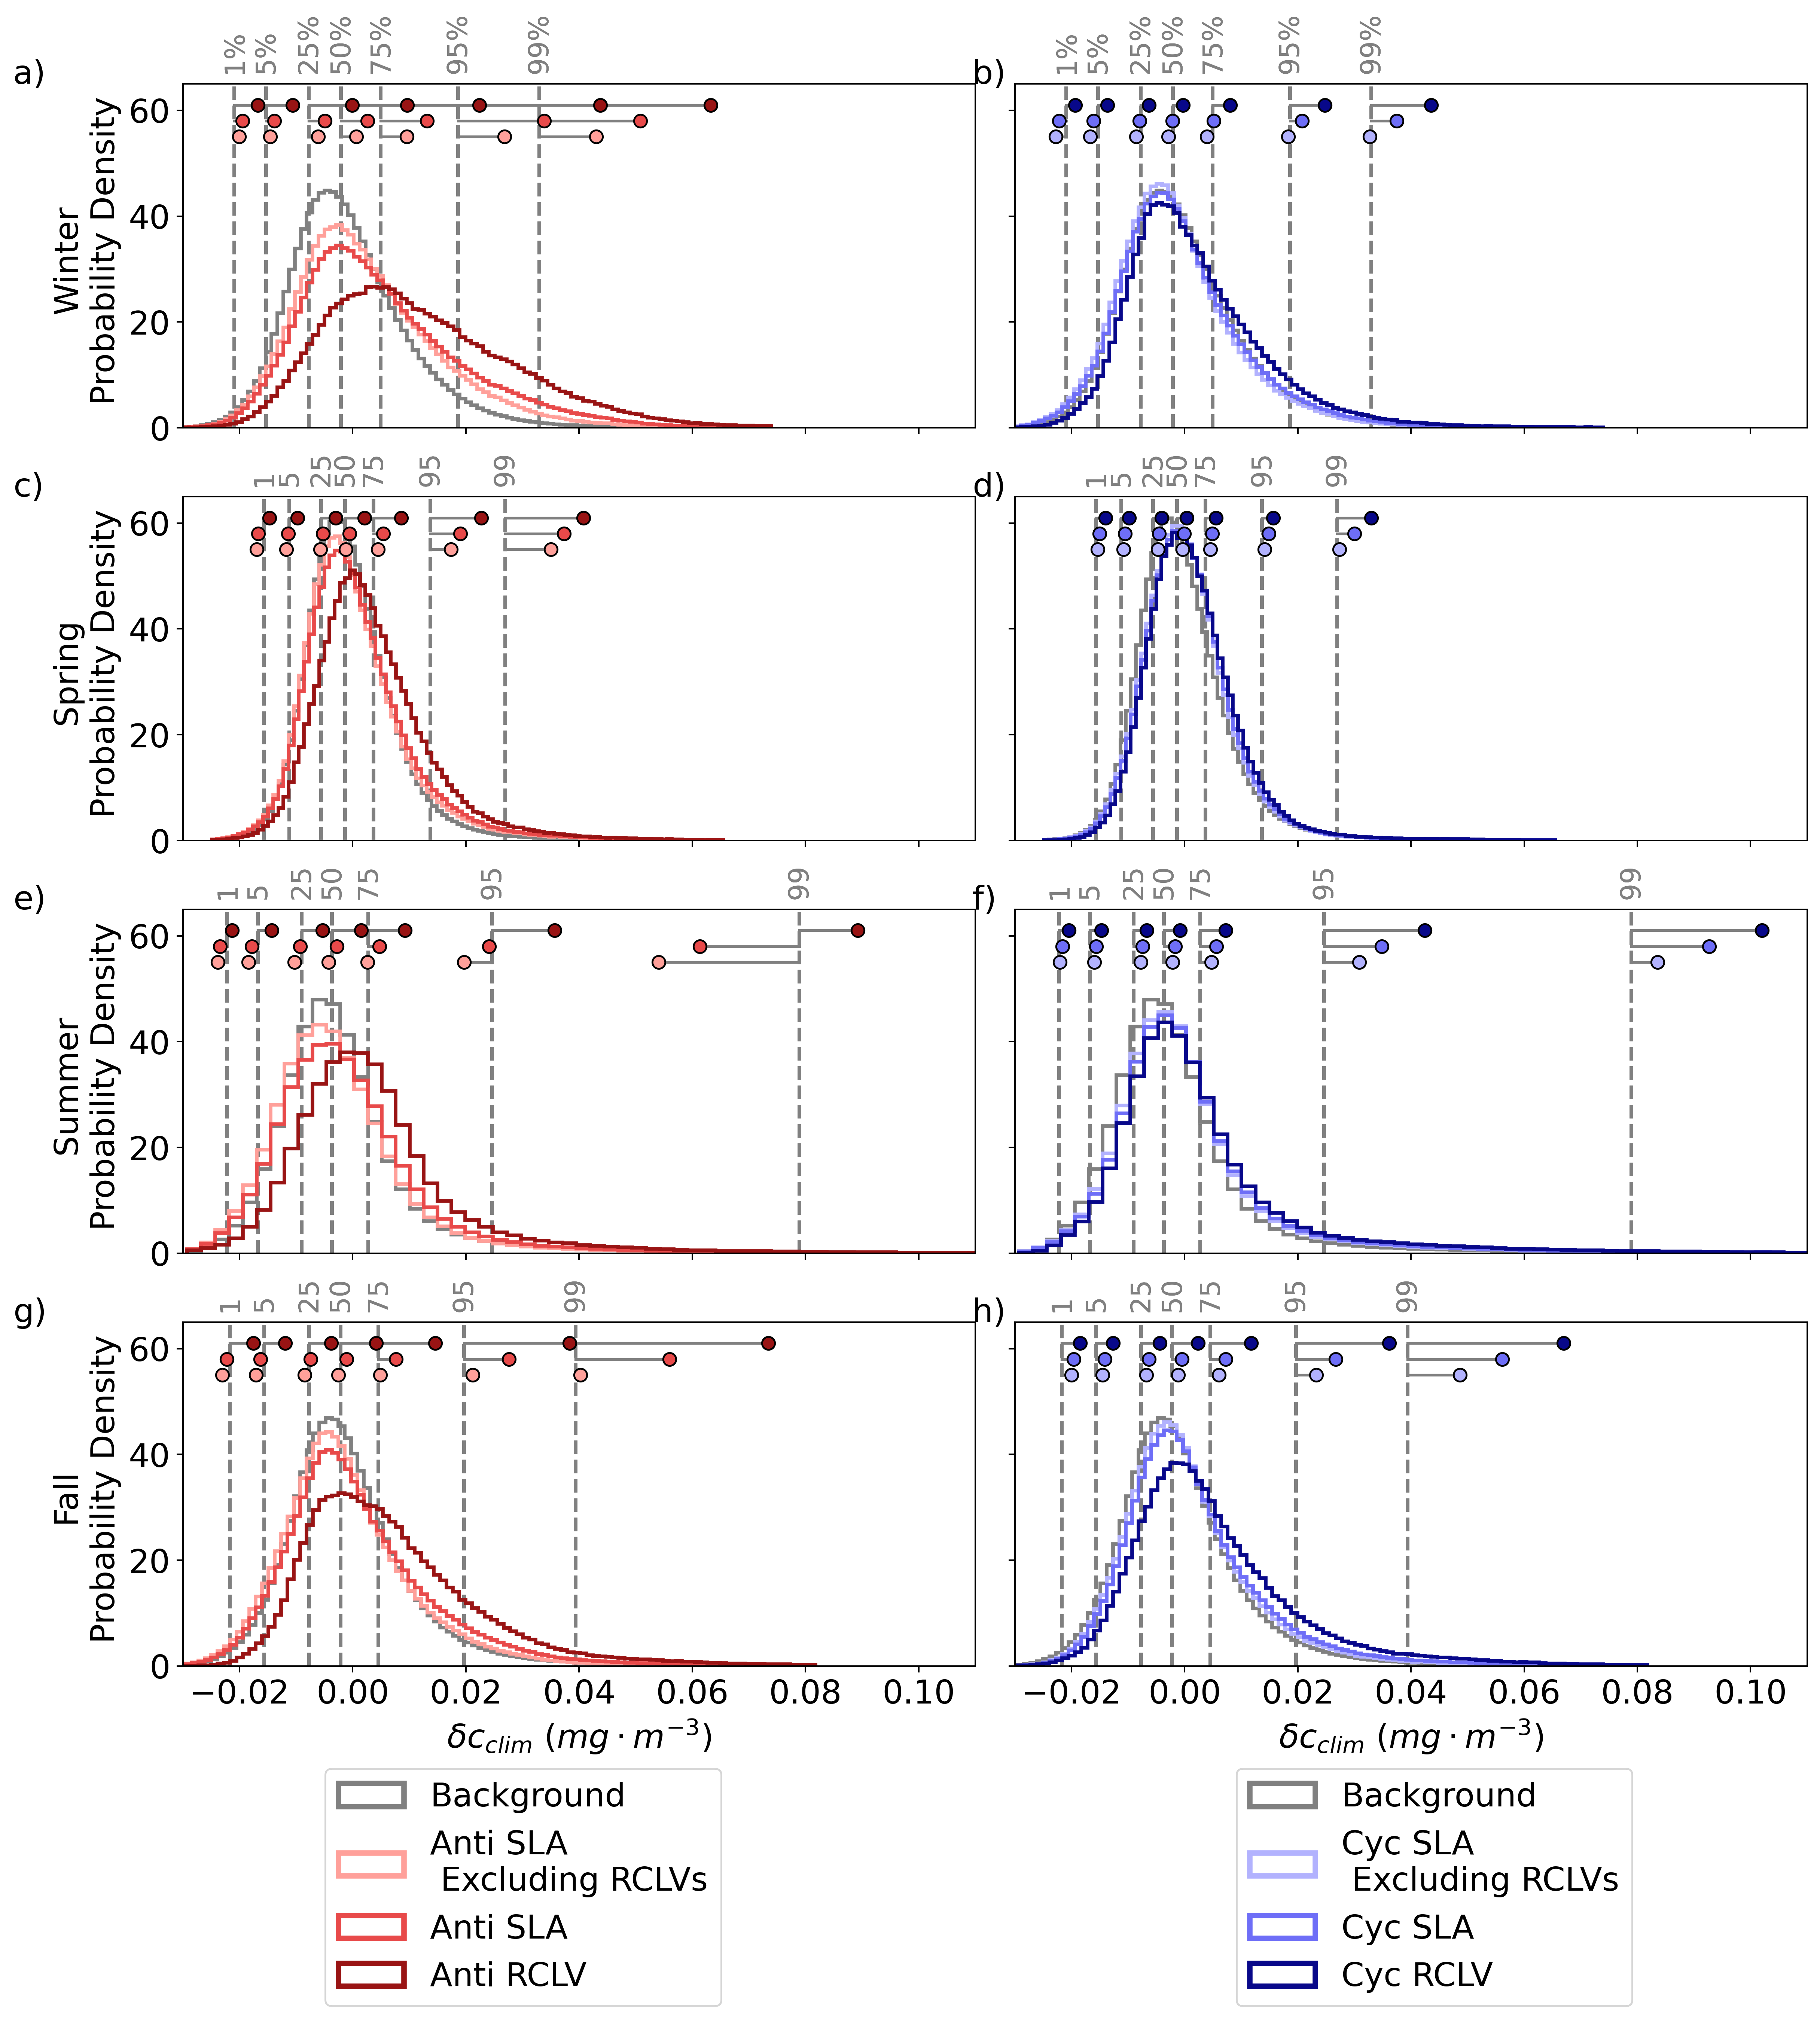

In [80]:
display(Image(filename=save_dir + 'lee_eddy_PDD_r1.png'))

In [ ]:
print(100*(24611335-19472926)/24611335)
print(100*(2573257-2154500)/2573257)
print(100*(2989498-2297869)/2989498)
print(100*(3537936-2675426)/3537936)
print(100*(3035172-2498944)/3035172)
print(100*(1314247-1115867)/1314247)
print(100*(1374094-1120926)/1374094)
print(100*(1925764-1511821)/1925764)
print(100*(1658451-1356411)/1658451)
print(100*(1599300-1218971)/1599300)
print(100*(1347659-1055755)/1347659)
print(100*(1648147-1249902)/1648147)
print(100*(1607810-1216534)/1607810)

In [ ]:
print(100*(25960826-19943322)/25960826)
print(100*(2369956-2015018)/2369956)
print(100*(2438519-1986213)/2438519)
print(100*(3257596-2604223)/3257596)
print(100*(2678662-2263668)/2678662)
print(100*(2055452-1474531)/2055452)
print(100*(2072384-1434013)/2072384)
print(100*(2451786-1608160)/2451786)
print(100*(2057854-1441224)/2057854)
print(100*(1383511-1105519)/1383511)
print(100*(1607596-1185369)/1607596)
print(100*(1981864-1499457)/1981864)
print(100*(1605646-1325927)/1605646)

In [ ]:
background_eddy_vals

In [25]:
data_dir = project_output_dir + 'eddy_masks_and_chl_2000_to_2020/chl_feature_bins_eddy_provinces/'

for province in [0,1]:
    if province == 1:
        p_str = 'North'
    elif province == 0:
        p_str = 'Southeast'
    for season in ['WINTER','SPRING','SUMMER','FALL']:  
        
        if season == 'WINTER':
            seas_str = 'Winter'
        elif season == 'SPRING':
            seas_str = 'Spring'
        elif season == 'SUMMER':
            seas_str = 'Summer'
        elif season == 'FALL':
            seas_str = 'Fall'
        
        #### Province key #### 0: SE, 1: Northern lats, 2: Upper cyclonic lee eddies, 3: Lower anticyclonic lee eddies
        bg_chl = np.load(data_dir + '%s_bg_chl_clim_anom_p%s.npy'%(season,province))
        SLA_only_anti_chl = np.load(data_dir + '%s_SSH_anti_chl_clim_anom_p%s.npy'%(season,province))
        RCLV_only_anti_chl = np.load(data_dir + '%s_coh_anti_chl_clim_anom_p%s.npy'%(season,province))
        overlap_anti_chl = np.load(data_dir + '%s_SSH_coh_anti_chl_clim_anom_p%s.npy'%(season,province))
        SLA_only_cyc_chl = np.load(data_dir + '%s_SSH_cyc_chl_clim_anom_p%s.npy'%(season,province))
        RCLV_only_cyc_chl = np.load(data_dir + '%s_coh_cyc_chl_clim_anom_p%s.npy'%(season,province))
        overlap_cyc_chl = np.load(data_dir + '%s_SSH_coh_cyc_chl_clim_anom_p%s.npy'%(season,province))
                        
        tot_pixels = (len(bg_chl)+len(SLA_only_anti_chl)+len(RCLV_only_anti_chl)+len(overlap_anti_chl)+
                        len(SLA_only_cyc_chl)+len(RCLV_only_cyc_chl)+len(overlap_cyc_chl))

        background_eddy_vals.append(['%s %s'%(p_str,seas_str),len(bg_chl),tot_pixels,'%s'%(round((len(bg_chl)/tot_pixels)*100,2)),'%s'%(round(((tot_pixels-len(bg_chl))/tot_pixels)*100,2))])

# Lee eddies  
for season in ['WINTER','SPRING','SUMMER','FALL']:  
        
    if season == 'WINTER':
        seas_str = 'Winter'
    elif season == 'SPRING':
        seas_str = 'Spring'
    elif season == 'SUMMER':
        seas_str = 'Summer'
    elif season == 'FALL':
        seas_str = 'Fall'
        
    bg_chl = np.concatenate((np.load(data_dir + '%s_bg_chl_clim_anom_p%s.npy'%(season,2)),
                                 np.load(data_dir + '%s_bg_chl_clim_anom_p%s.npy'%(season,3))))
    SLA_only_anti_chl = np.concatenate((np.load(data_dir + '%s_SSH_anti_chl_clim_anom_p%s.npy'%(season,2)),
                                  np.load(data_dir + '%s_SSH_anti_chl_clim_anom_p%s.npy'%(season,3))))
    RCLV_only_anti_chl = np.concatenate((np.load(data_dir + '%s_coh_anti_chl_clim_anom_p%s.npy'%(season,2)),
                                  np.load(data_dir + '%s_coh_anti_chl_clim_anom_p%s.npy'%(season,3))))
    overlap_anti_chl = np.concatenate((np.load(data_dir + '%s_SSH_coh_anti_chl_clim_anom_p%s.npy'%(season,2)),
                                      np.load(data_dir + '%s_SSH_coh_anti_chl_clim_anom_p%s.npy'%(season,3))))


    SLA_only_cyc_chl = np.concatenate((np.load(data_dir + '%s_SSH_cyc_chl_clim_anom_p%s.npy'%(season,2)),
                                  np.load(data_dir + '%s_SSH_cyc_chl_clim_anom_p%s.npy'%(season,3))))
    RCLV_only_cyc_chl = np.concatenate((np.load(data_dir + '%s_coh_cyc_chl_clim_anom_p%s.npy'%(season,2)),
                                  np.load(data_dir + '%s_coh_cyc_chl_clim_anom_p%s.npy'%(season,3))))
    overlap_cyc_chl = np.concatenate((np.load(data_dir + '%s_SSH_coh_cyc_chl_clim_anom_p%s.npy'%(season,2)),
                                      np.load(data_dir + '%s_SSH_coh_cyc_chl_clim_anom_p%s.npy'%(season,3))))
    
    tot_pixels = (len(bg_chl)+len(SLA_only_anti_chl)+len(RCLV_only_anti_chl)+len(overlap_anti_chl)+
                        len(SLA_only_cyc_chl)+len(RCLV_only_cyc_chl)+len(overlap_cyc_chl))

    background_eddy_vals.append(['Lee %s'%(seas_str),len(bg_chl),tot_pixels,'%s'%(round((len(bg_chl)/tot_pixels)*100,2)),'%s'%(round(((tot_pixels-len(bg_chl))/tot_pixels)*100,2))])

21532559
18258682
20166222
20402474
34714777
31399552
33562785
33645026


In [26]:
background_eddy_vals

[['', 'Background', 'Total', '% Background', '% Eddy'],
 ['Full Domain (All Seasons)', 283319424, 342639336, '82.69', '17.31'],
 ['Southeast Winter', 21532559, 25492001, '84.47', '15.53'],
 ['Southeast Spring', 18258682, 22248211, '82.07', '17.93'],
 ['Southeast Summer', 20166222, 25196567, '80.04', '19.96'],
 ['Southeast Fall', 20402474, 24790660, '82.3', '17.7'],
 ['North Winter', 34714777, 40557149, '85.59', '14.41'],
 ['North Spring', 31399552, 37953527, '82.73', '17.27'],
 ['North Summer', 33562785, 41572823, '80.73', '19.27'],
 ['North Fall', 33645026, 40362613, '83.36', '16.64'],
 ['Lee Winter', 19367590, 22851111, '84.76', '15.24'],
 ['Lee Spring', 16098112, 19571488, '82.25', '17.75'],
 ['Lee Summer', 17564995, 21723290, '80.86', '19.14'],
 ['Lee Fall', 16606650, 20319896, '81.73', '18.27']]